# Figure 1-3 Ape AGW

## 1. Summary statistics from the dataset

## 2. Histogram of the distribution of different types of mutatinos

## 3. Scatterplot of the variants

## 4. Logo plot of the mutations that are enhancing in Cis and Trans

In [68]:
import pandas as pd
from sciutil import SciUtil
import numpy as np

u = SciUtil()

data_dir = '/Users/ariane/Documents/code/MinION/manucript/notebooks/Ape AGW/Data/'

df = pd.read_csv(f'{data_dir}parlq2_Dataset_combined.csv')

In [69]:
df

id  barcode_plate Plate_data Well_data  \
0     20240502_300-1_A1              1      300-1        A1   
1     20240502_300-1_A2              1      300-1        A2   
2     20240502_300-1_A3              1      300-1        A3   
3     20240502_300-1_A4              1      300-1        A4   
4     20240502_300-1_A5              1      300-1        A5   
..                  ...            ...        ...       ...   
955  20240422_500-1_D12              3      500-1       D12   
956   20240422_300-2_B1              2      300-2        B1   
957  20240422_300-2_C11              2      300-2       C11   
958   20240422_300-2_H2              2      300-2        H2   
959  20240422_300-2_B11              2      300-2       B11   

                                          Variant_data  Alignment Count  \
0                                               #N.A.#              0.0   
1                                               #N.A.#              1.0   
2                                               #N.A.#              2.0   
3                                                T163C             57.0   
4                              T124C_G269T_G369T_G519C             84.0   
..                                                 ...              ...   
955                                              G510A            124.0   
956                                           #PARENT#            132.0   
957                                            G489DEL            149.0   
958  T526C_A528C_C529G_G532DEL_T533DEL_A534DEL_G535...            198.0   
959                                           #PARENT#            217.0   

     Average mutation frequency        P value   P adj. value  \
0                           NaN            NaN            NaN   
1                           NaN            NaN            NaN   
2                           NaN            NaN            NaN   
3                      0.929825   2.096405e-78   2.012549e-76   
4                      0.976190   0.000000e+00   0.000000e+00   
..                          ...            ...            ...   
955                    0.959677  2.780000e-199  2.670000e-197   
956                         NaN            NaN            NaN   
957                    0.966443  3.090000e-232  2.960000e-230   
958                    0.794765   0.000000e+00   0.000000e+00   
959                         NaN            NaN            NaN   

                 Mutations  ... Experiment_data Well  Row Column  Plate  \
0                   #N.A.#  ...        20240502   A1    A      1  300-1   
1                   #N.A.#  ...        20240502   A2    A      2  300-1   
2                   #N.A.#  ...        20240502   A3    A      3  300-1   
3                 #PARENT#  ...        20240502   A4    A      4  300-1   
4    C42R_G90V_K123N_L173F  ...        20240502   A5    A      5  300-1   
..                     ...  ...             ...  ...  ...    ...    ...   
955                  W170*  ...        20240422  D12    D     12  500-1   
956               #PARENT#  ...        20240422   B1    B      1  300-2   
957                      -  ...        20240422  C11    C     11  300-2   
958                      -  ...        20240422   H2    H      2  300-2   
959               #PARENT#  ...        20240422  B11    B     11  300-2   

             cis        trans  Experiment  Variant  Normalized Activity  
0         0.0000       0.0000    20240502      NaN                  NaN  
1    637254.1761  287893.7723    20240502      NaN                  NaN  
2    488267.4370  114108.3541    20240502      NaN                  NaN  
3    255632.3224  144744.6698    20240502      NaN                  NaN  
4     72160.5364   55820.5348    20240502      NaN                  NaN  
..           ...          ...         ...      ...                  ...  
955   44806.7453   52104.0684    20240422      NaN                  NaN  
956  532232.5596  577681.6171    20240422      NaN                  NaN  
957       0.000

## 1. Summary statistics from the dataset

We want to know: 

1. Alignment across the dataset
2. Number of wells not meeting our threshold (< 6)
3. Number of wells not meeting ParSEQs threshold
4. Number of parents, mutation counts, deltions resulting in a frameshift mutation, truncated sequneces


In [70]:
df['# mutations'] = [len(x.split('_')) if x != '#PARENT#' else 0 for x in df['Mutations'].values]
features = ['cis', 'trans', 'Average mutation frequency', '# mutations', 'Alignment Count']
# Normalise each of these columns 
# Let's first drop parenst # df[df['EPS'].notna()]
for f in features:
    vals = df[f].values
    df[f'{f}_norm'] = (vals - np.nanmean(vals))/(np.nanstd(vals))
    df[f'{f}_log2'] = np.log2(vals + 1)

In [71]:
df[['Alignment Count', 'Average mutation frequency', '# mutations']].describe()

Alignment Count  Average mutation frequency  # mutations
count       960.000000                  519.000000   960.000000
mean         41.541667                    0.921268     0.971875
std          50.921870                    0.096788     0.916902
min           0.000000                    0.460000     0.000000
25%           7.000000                    0.909091     0.000000
50%          24.500000                    0.947115     1.000000
75%          59.000000                    0.973509     1.000000
max         404.000000                    1.000000     5.000000

In [72]:
df['# mutations'].value_counts()

# mutations
1    487
0    296
2    112
3     40
4     23
5      2
Name: count, dtype: int64

In [73]:
# Now classify each of them with the specific labels
df['trunc_label'] = ['Truncated' if '*' in v else 'OK' for v in df['aa_variant'].values]
df['Variant_info'] = [m if '*' not in str(v) else '#TRUNCATED#' for m, v in df[['Mutations', 'aa_variant']].values]

na_df = df[df['Variant_info'] == '#N.A.#']
trunc_df = df[df['Variant_info'] == '#TRUNCATED#']
deletion_df = df[df['Mutations'] == '-'] # Delection
parent_df = df[df['Variant_data'] == '#PARENT#']
variant_df = df[~df['Variant_info'].isin(['#PARENT#', '#N.A.#', '#TRUNCATED#', '-'])]
u.dp(['Number of frame shifts: ', len(na_df), 
      '\nNumber of truncations: ', len(trunc_df), 
      '\nNumber of parents: ',  len(parent_df), 
      '\nNumber of variants:',  len(variant_df)
     ])


--------------------------------------------------------------------------------
Number of frame shifts: 	210	
Number of truncations: 	37	
Number of parents: 	211	
Number of variants:	363	
--------------------------------------------------------------------------------


In [74]:
df['Variant_info'] = [v if v != '-' else '#DELETION#' for v in df['Variant_info'].values]
df['Variant_info'] = [v if v[0] == '#' else '#VARIANT#' for v in df['Variant_info'].values]
df['Variant_info'].value_counts()

Variant_info
#VARIANT#      363
#PARENT#       296
#N.A.#         210
#DELETION#      54
#TRUNCATED#     37
Name: count, dtype: int64

In [75]:
cols = ['Alignment Count', 'Average mutation frequency', '# mutations', 
       'P adj. value', 'cis', 'trans', 'cis_norm', 'trans_norm']
na_df[cols].describe()

Alignment Count  Average mutation frequency  # mutations  P adj. value  \
count       210.000000                         0.0        210.0           0.0   
mean          0.933333                         NaN          1.0           NaN   
std           1.281198                         NaN          0.0           NaN   
min           0.000000                         NaN          1.0           NaN   
25%           0.000000                         NaN          1.0           NaN   
50%           0.000000                         NaN          1.0           NaN   
75%           2.000000                         NaN          1.0           NaN   
max           4.000000                         NaN          1.0           NaN   

                cis         trans    cis_norm  trans_norm  
count  2.100000e+02  2.100000e+02  210.000000  210.000000  
mean   4.657067e+05  3.865525e+05   -0.173001   -0.192945  
std    3.724763e+05  2.763710e+05    0.768123    0.764668  
min    0.000000e+00  0.000000e+00   -1.133384   -1.262465  
25%    2.473046e+05  2.138043e+05   -0.623391   -0.670908  
50%    4.888782e+05  4.185901e+05   -0.125216   -0.104303  
75%    5.899789e+05  4.844640e+05    0.083274    0.077958  
max    2.426330e+06  1.813075e+06    3.870211    3.753982

In [76]:
trunc_df[cols].describe()

Alignment Count  Average mutation frequency  # mutations  \
count        37.000000                   37.000000    37.000000   
mean         60.702703                    0.932334     1.945946   
std          72.423471                    0.051752     0.880213   
min           6.000000                    0.809524     1.000000   
25%          20.000000                    0.915385     1.000000   
50%          34.000000                    0.943089     2.000000   
75%          92.000000                    0.959459     2.000000   
max         404.000000                    1.000000     4.000000   

        P adj. value           cis          trans   cis_norm  trans_norm  
count   3.700000e+01  3.700000e+01      37.000000  37.000000   37.000000  
mean    1.030437e-06  1.347184e+05  113100.999316  -0.855567   -0.949536  
std     4.682640e-06  2.224366e+05  148729.425016   0.458710    0.411507  
min     0.000000e+00  0.000000e+00       0.000000  -1.133384   -1.262465  
25%    8.140000e-168  3.026028e+04   23513.558200  -1.070981   -1.197408  
50%     2.940000e-91  6.382506e+04   58656.296100  -1.001764   -1.100174  
75%     1.337657e-40  1.260810e+05  145793.736500  -0.873379   -0.859081  
max     2.620000e-05  1.174134e+06  705836.734500   1.287923    0.690456

In [77]:
deletion_df[cols].describe()

Alignment Count  Average mutation frequency  # mutations  \
count        54.000000                   54.000000         54.0   
mean         56.740741                    0.910222          1.0   
std          47.913517                    0.067288          0.0   
min           8.000000                    0.666667          1.0   
25%          21.000000                    0.895527          1.0   
50%          47.000000                    0.925227          1.0   
75%          70.750000                    0.952381          1.0   
max         234.000000                    1.000000          1.0   

        P adj. value           cis          trans   cis_norm  trans_norm  
count   5.400000e+01  5.400000e+01      54.000000  54.000000   54.000000  
mean    7.333333e-07  1.569935e+05  138445.915383  -0.809631   -0.879411  
std     5.388877e-06  2.201174e+05  190237.392022   0.453928    0.526352  
min     0.000000e+00  0.000000e+00       0.000000  -1.133384   -1.262465  
25%    7.400000e-231  3.496019e+04   27236.848125  -1.061289   -1.187106  
50%    1.345000e-102  6.555243e+04   55723.460250  -0.998202   -1.108289  
75%     5.974907e-56  1.208467e+05  174363.487700  -0.884174   -0.780033  
max     3.960000e-05  1.002593e+06  916204.844600   0.934170    1.272506

In [78]:
parent_df[cols].describe()

Alignment Count  Average mutation frequency  # mutations  P adj. value  \
count       211.000000                         0.0        211.0           0.0   
mean         55.502370                         NaN          0.0           NaN   
std          53.469384                         NaN          0.0           NaN   
min           6.000000                         NaN          0.0           NaN   
25%          18.500000                         NaN          0.0           NaN   
50%          40.000000                         NaN          0.0           NaN   
75%          73.000000                         NaN          0.0           NaN   
max         380.000000                         NaN          0.0           NaN   

                cis         trans    cis_norm  trans_norm  
count  2.110000e+02  2.110000e+02  211.000000  211.000000  
mean   7.073456e+05  6.002981e+05    0.325309    0.398450  
std    4.836077e+05  3.619558e+05    0.997300    1.001465  
min    6.748808e+04  3.874628e+04   -0.994210   -1.155261  
25%    4.431775e+05  3.515071e+05   -0.219460   -0.289909  
50%    5.633748e+05  4.761919e+05    0.028411    0.055071  
75%    7.989049e+05  7.893476e+05    0.514123    0.921515  
max    2.276523e+06  1.574998e+06    3.561278    3.095266

In [79]:
variant_df[cols].describe()

Alignment Count  Average mutation frequency  # mutations  \
count       363.000000                  363.000000   363.000000   
mean         53.220386                    0.922829     1.644628   
std          49.789124                    0.100078     0.909066   
min           6.000000                    0.460000     1.000000   
25%          17.000000                    0.916667     1.000000   
50%          40.000000                    0.950000     1.000000   
75%          69.500000                    0.975196     2.000000   
max         365.000000                    1.000000     5.000000   

        P adj. value           cis         trans    cis_norm  trans_norm  
count   3.630000e+02  3.630000e+02  3.630000e+02  363.000000  363.000000  
mean    1.728411e-05  5.878428e+05  4.795889e+05    0.078869    0.064469  
std     2.264437e-04  5.267141e+05  3.761511e+05    1.086194    1.040741  
min     0.000000e+00  0.000000e+00  0.000000e+00   -1.133384   -1.262465  
25%    9.000982e-178  2.642302e+05  2.153526e+05   -0.588487   -0.666624  
50%     2.390000e-80  4.796308e+05  4.115494e+05   -0.144286   -0.123784  
75%     2.725000e-33  6.839855e+05  6.454817e+05    0.277136    0.523465  
max     4.023220e-03  3.176372e+06  1.708653e+06    5.416954    3.465064

## 2. Histogram of the distribution of different types of mutatinos


Text(0.5, 1.0, 'Alignment counts')

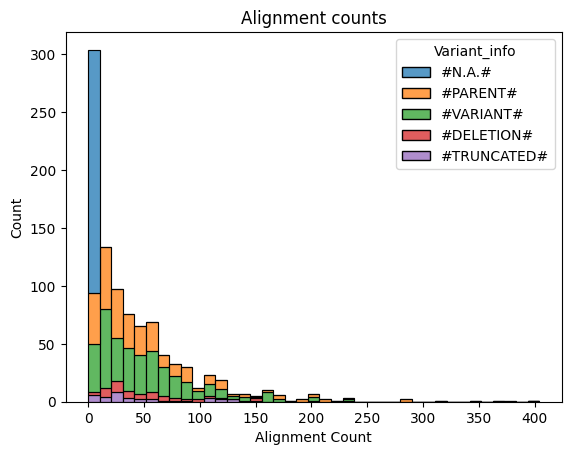

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="Alignment Count", hue="Variant_info", multiple="stack")
plt.title('Alignment counts')

Text(0.5, 1.0, 'trans')

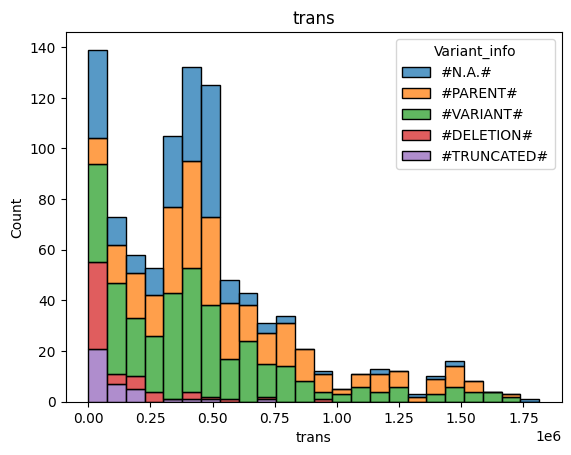

In [81]:
col = 'trans'
sns.histplot(data=df, x=col, hue="Variant_info", multiple="stack")
plt.title(f'{col}')

Text(0.5, 1.0, 'cis')

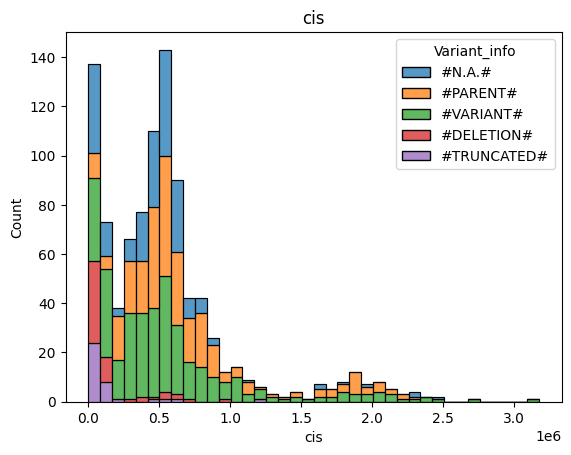

In [82]:
col = 'cis'
sns.histplot(data=df, x=col, hue="Variant_info", multiple="stack")
plt.title(f'{col}')

Text(0.5, 1.0, 'Cis vs Trans')

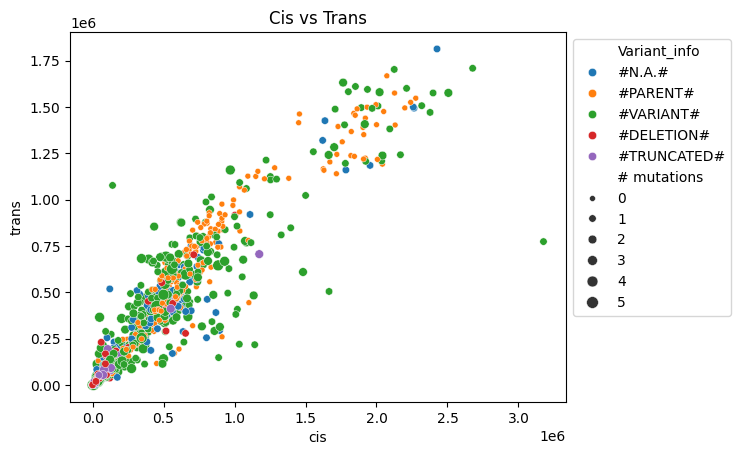

In [83]:
import seaborn as sns

ax = sns.scatterplot(df, x='cis', y='trans', hue='Variant_info', size='# mutations')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Cis vs Trans')

## Make logo plots of all the protoglobins

The following search on uniprot provides 406 results: `(Protoglobin ApPgb) OR uniref_cluster_50:UniRef50_A0A7U4E8E6`. This was on the 11th of May 2024.

In [84]:
from Bio import AlignIO, SeqIO
import os
def make_msa(seqs, seq_ids, file_to_align='msa.fa'):
    """
    Potentialy change this so that the MSA file has the unique time stamp so that we don't get overriding issues.
    """
    with open(file_to_align, 'w+') as fout:
        for i, seq in enumerate(seqs):
            if isinstance(seq, str) and len(seq) > 0:
                fout.write(f'>{seq_ids[i]}\n{seq}\n')

    # Now make the msa
    msa_file = f'{file_to_align.replace(".fa", "_msa.fa")}'
    # Write each one as a fasta file then run the clustal and then the tree
    os.system(f'/Users/ariane/Documents/code/MinION/software/./clustal-omega-1.2.3-macosx --force -i {file_to_align} -o {msa_file} -v')
    # Reading the alignment file
    alignment = AlignIO.read(msa_file, 'fasta')
    return alignment


# Read in an alignment from uniprot and then add in the sequences of the top 10 variants 
top_cis = df.sort_values(by='cis', ascending=False)
top_cis # Add into the MSA
# Using the sequences let's now get the MSA
alignment = AlignIO.read(f"{data_dir}uniprot/uniprotkb_uniref_cluster_50_UniRef50_A0_2024_05_07_msa.fasta", "fasta")
seqs = []
seq_ids = []
for id, mutations, seq in top_cis[['id', 'Mutations', 'aa_variant']].values:
    seqs.append(seq)
    seq_ids.append(f'{id}_{mutations}')

for seq_record in SeqIO.parse(f'{data_dir}uniprot/uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta', "fasta"):
    seq_ids.append(seq_record.id)
    seqs.append(str(seq_record.seq.replace('-', '')))

alignment = make_msa(seqs, seq_ids, f'/Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta')



Using 16 threads
Read 1366 sequences (type: Protein) from /Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11.fasta
Using 108 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1366 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 6.86u 0.06s 00:00:06.92 Elapsed: 00:00:00
mBed created 15 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)


Distance calculation within sub-clusters done. CPU time: 4.67u 0.07s 00:00:04.74 Elapsed: 00:00:00
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 12.14u 9.02s 00:00:21.16 Elapsed: 00:00:14
Alignment written to /Users/ariane/Documents/code/MinION/APE_AGW_uniprotkb_Protoglobin_ApPgb_OR_uniref_c_2024_05_11_msa.fasta


In [85]:
df

id  barcode_plate Plate_data Well_data  \
0     20240502_300-1_A1              1      300-1        A1   
1     20240502_300-1_A2              1      300-1        A2   
2     20240502_300-1_A3              1      300-1        A3   
3     20240502_300-1_A4              1      300-1        A4   
4     20240502_300-1_A5              1      300-1        A5   
..                  ...            ...        ...       ...   
955  20240422_500-1_D12              3      500-1       D12   
956   20240422_300-2_B1              2      300-2        B1   
957  20240422_300-2_C11              2      300-2       C11   
958   20240422_300-2_H2              2      300-2        H2   
959  20240422_300-2_B11              2      300-2       B11   

                                          Variant_data  Alignment Count  \
0                                               #N.A.#              0.0   
1                                               #N.A.#              1.0   
2                                               #N.A.#              2.0   
3                                                T163C             57.0   
4                              T124C_G269T_G369T_G519C             84.0   
..                                                 ...              ...   
955                                              G510A            124.0   
956                                           #PARENT#            132.0   
957                                            G489DEL            149.0   
958  T526C_A528C_C529G_G532DEL_T533DEL_A534DEL_G535...            198.0   
959                                           #PARENT#            217.0   

     Average mutation frequency        P value   P adj. value  \
0                           NaN            NaN            NaN   
1                           NaN            NaN            NaN   
2                           NaN            NaN            NaN   
3                      0.929825   2.096405e-78   2.012549e-76   
4                      0.976190   0.000000e+00   0.000000e+00   
..                          ...            ...            ...   
955                    0.959677  2.780000e-199  2.670000e-197   
956                         NaN            NaN            NaN   
957                    0.966443  3.090000e-232  2.960000e-230   
958                    0.794765   0.000000e+00   0.000000e+00   
959                         NaN            NaN            NaN   

                 Mutations  ... trans_norm trans_log2  \
0                   #N.A.#  ...  -1.262465   0.000000   
1                   #N.A.#  ...  -0.465916  18.135182   
2                   #N.A.#  ...  -0.946748  16.800058   
3                 #PARENT#  ...  -0.861983  17.143161   
4    C42R_G90V_K123N_L173F  ...  -1.108020  15.768534   
..                     ...  ...        ...        ...   
955                  W170*  ...  -1.118303  15.669136   
956               #PARENT#  ...   0.335874  19.139918   
957                      -  ...  -1.262465   0.000000   
958                      -  ...  -1.210149  14.206810   
959               #PARENT#  ...   0.806779  19.512447   

     Average mutation frequency_norm Average mutation frequency_log2  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                                NaN                             NaN   
3                           0.088493                        0.948470   
4                           0.568004                        0.982722   
..                               ...                             ...   
955                         0.397228                        0.970616   
956                              NaN                             NaN   
957                         0.467196                        0.975588   
958                        -1.308280                        0.843795   
959                              NaN                             NaN   

    # mutations_norm  # mutation

In [91]:
import logomaker
import matplotlib.pyplot as plt

record_map = {record.id:record.seq for record in alignment}
position_map = {}
for id, mutations in df[['id', 'Mutations']].values:
    if len(str(mutations)) > 6:
        seq = record_map.get(f'{id}_{mutations.split(" ")[0]}')
        if 'PARENT' not in mutations and 'DEL' not in mutations and 'NA' not in mutations:
            for mutation in mutations.split('_'):
                position = int(mutation[1:-1])
                new_position = position - 1
                # now we add to that position until we get to that in the seqeunce
                gap_count = 0
                position_count = 0
                for i in range(0, len(seq)):
                    if seq[i] != '-':
                        position_count += 1
                        if position_count == position:
                            break
                    else:
                        gap_count += 1
                position_map[f'{id}|{mutation}'] = new_position + gap_count

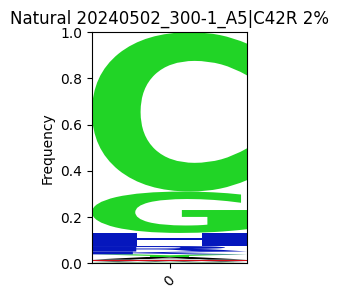

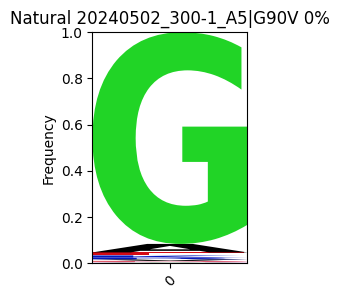

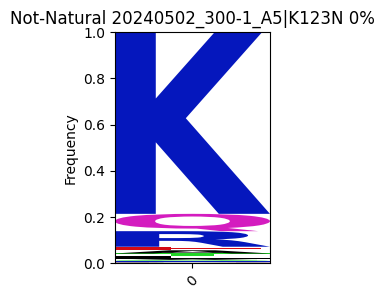

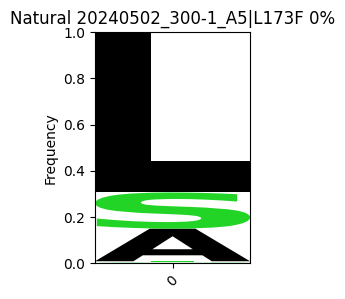

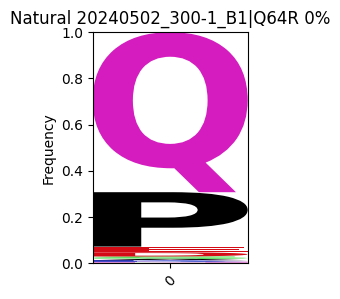

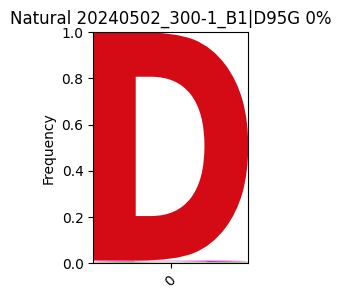

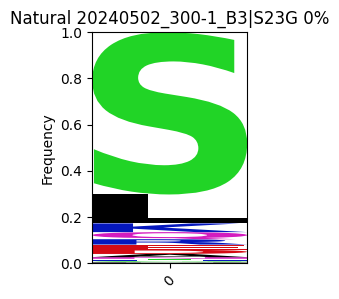

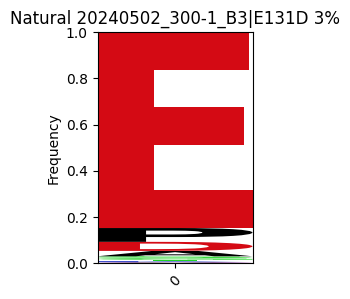

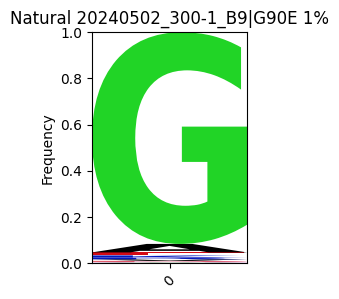

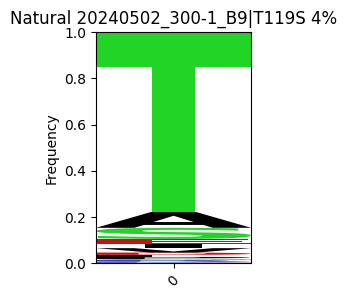

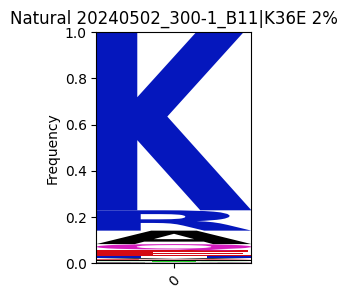

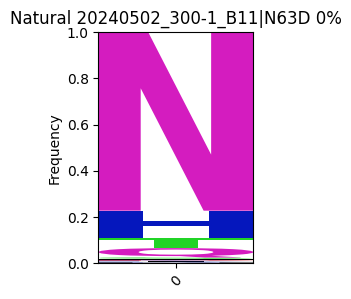

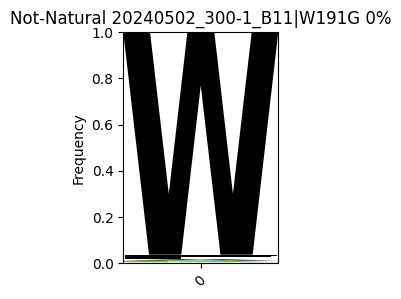

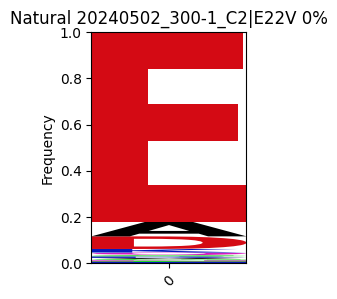

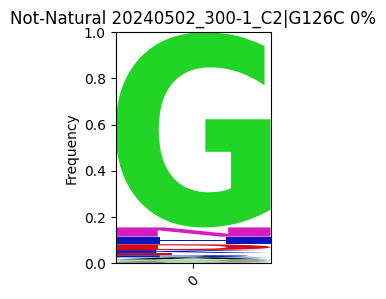

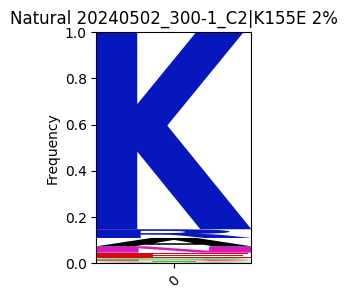

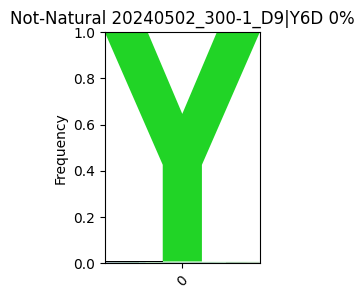

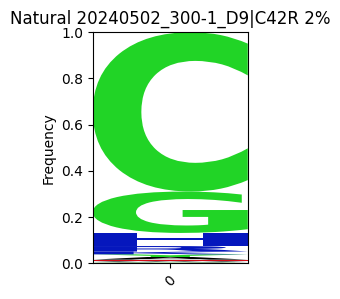

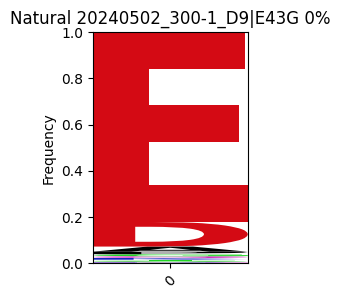

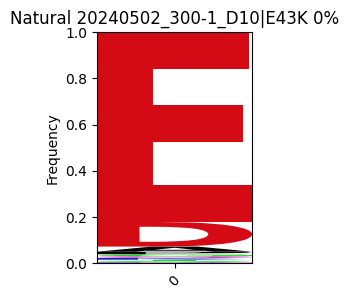

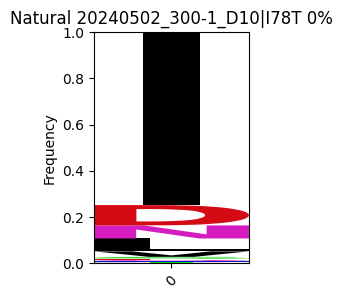

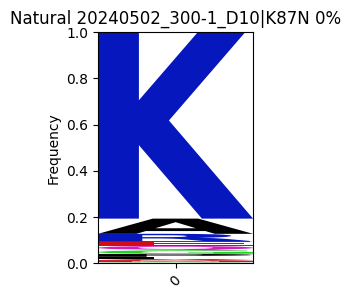

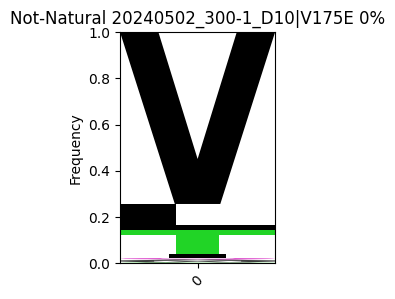

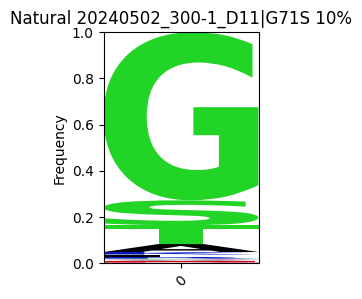

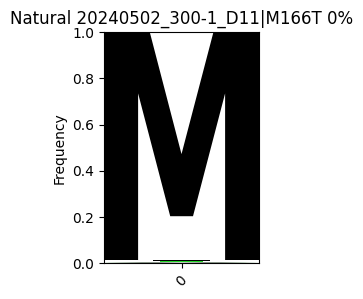

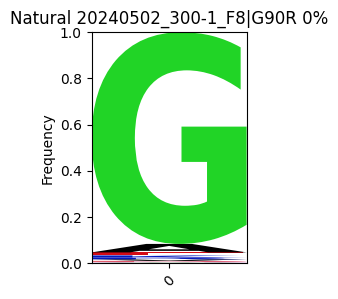

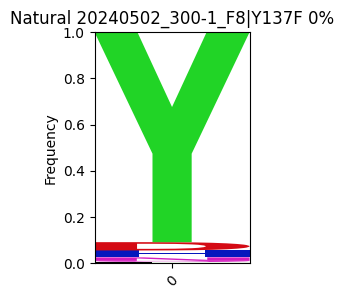

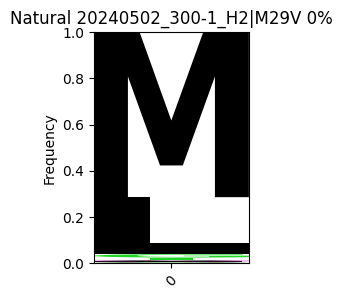

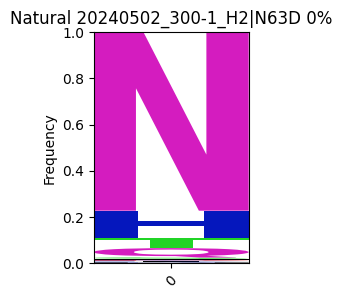

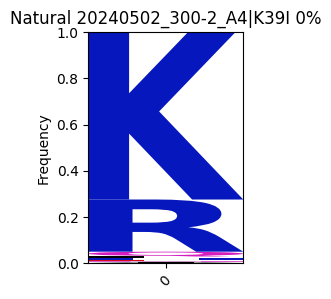

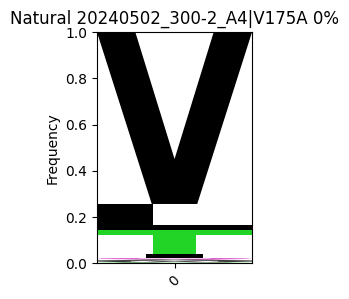

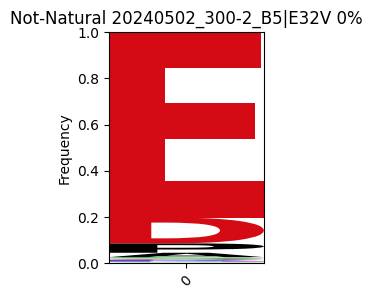

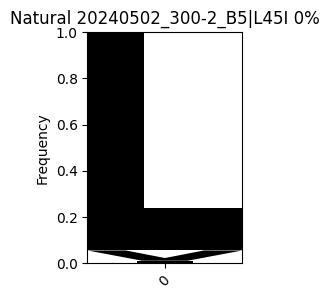

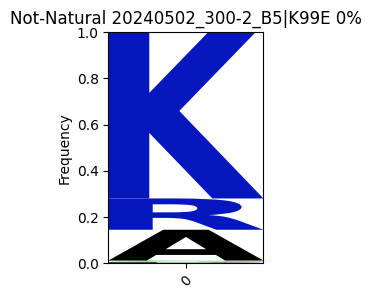

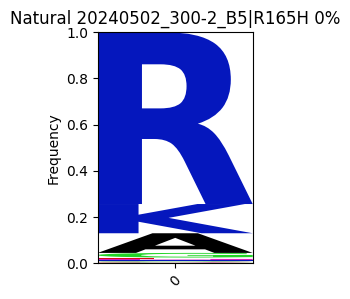

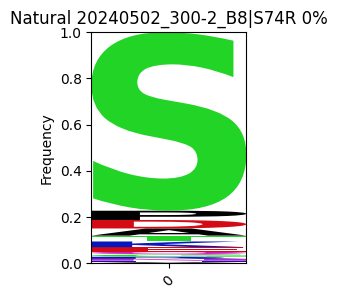

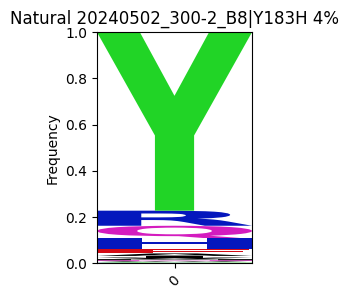

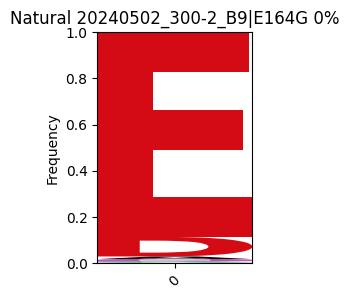

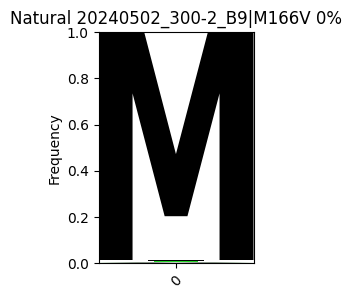

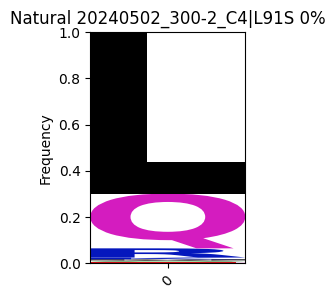

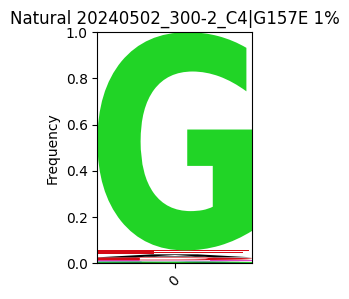

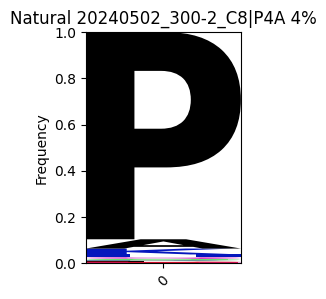

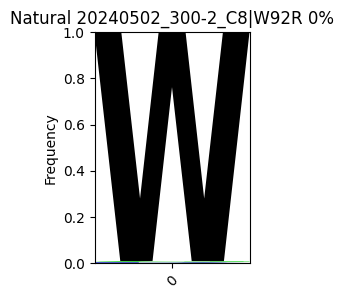

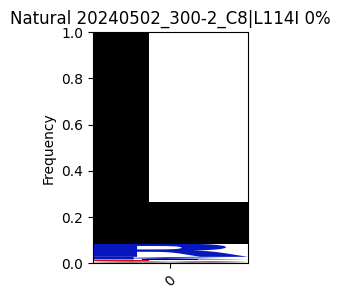

20240502_300-2_C8|W167*


<Figure size 200x300 with 0 Axes>

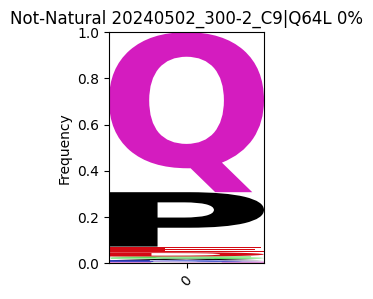

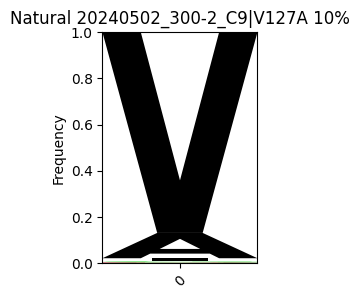

20240502_300-2_C11|L24*


<Figure size 200x300 with 0 Axes>

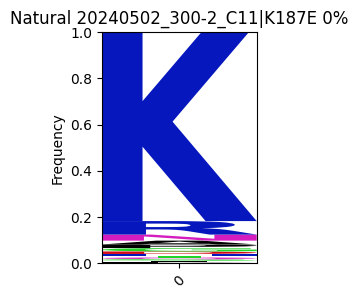

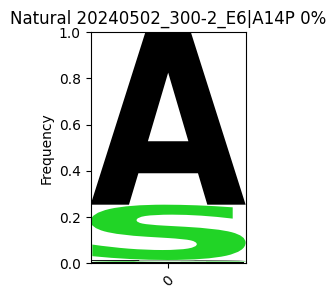

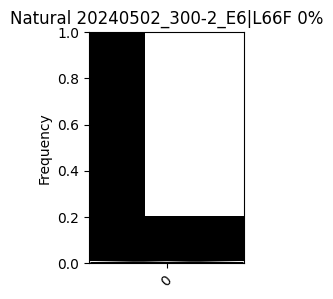

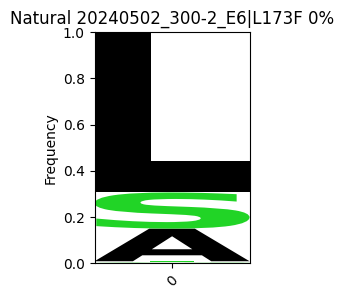

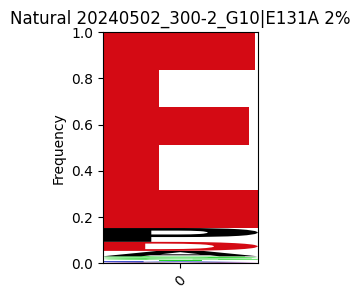

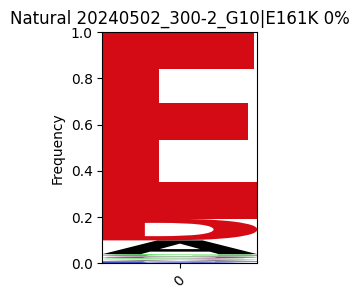

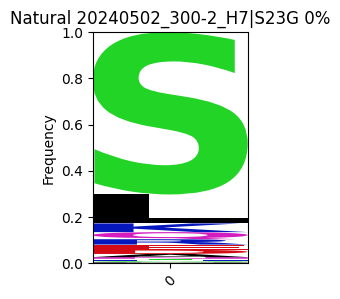

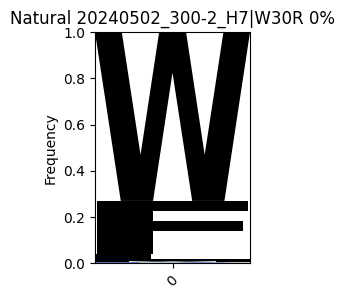

20240502_300-3_A4|L97*


<Figure size 200x300 with 0 Axes>

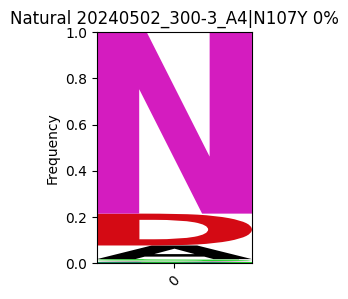

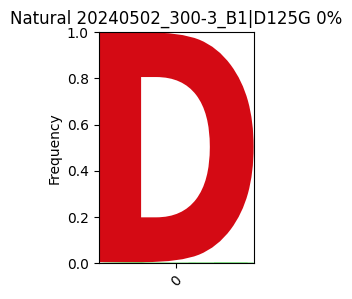

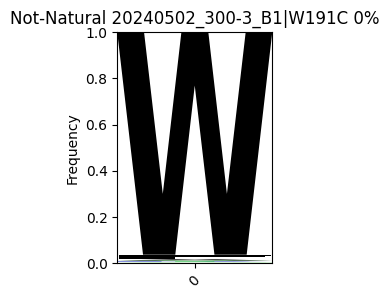

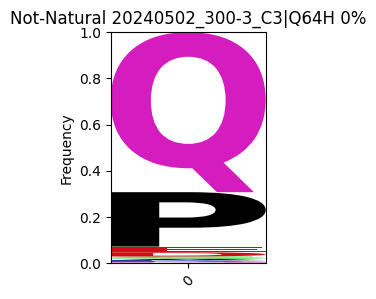

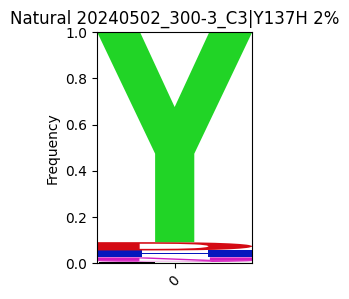

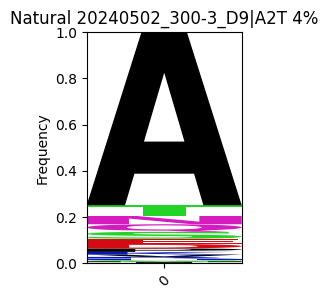

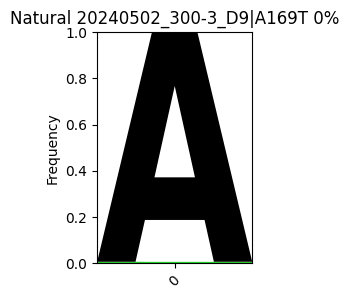

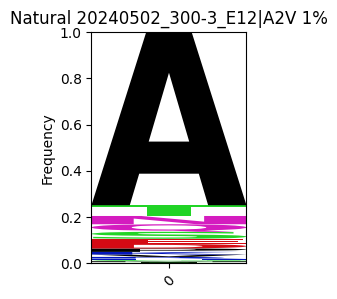

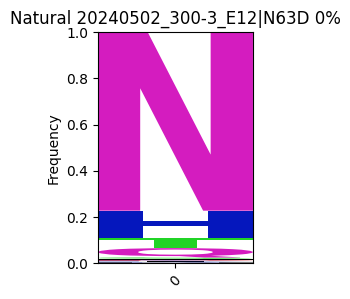

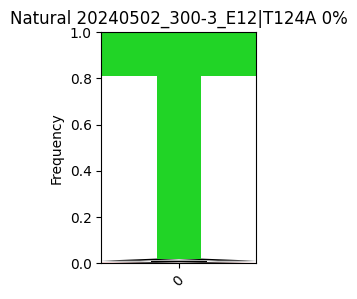

20240502_300-3_F2|L55*


<Figure size 200x300 with 0 Axes>

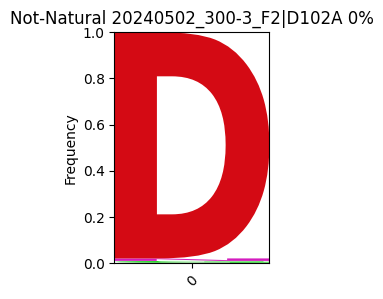

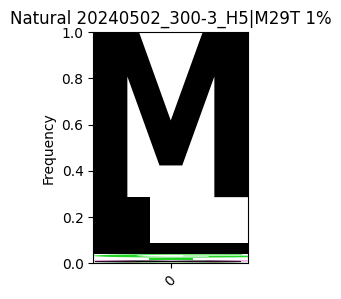

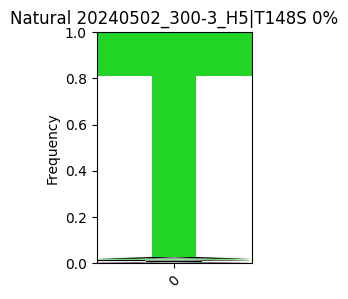

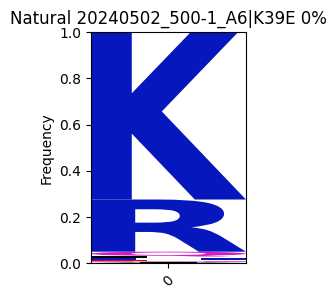

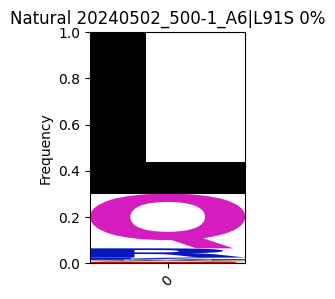

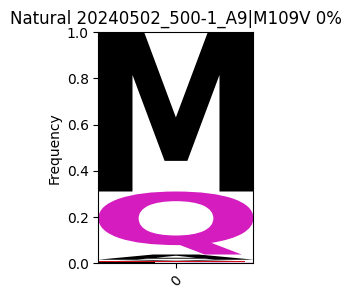

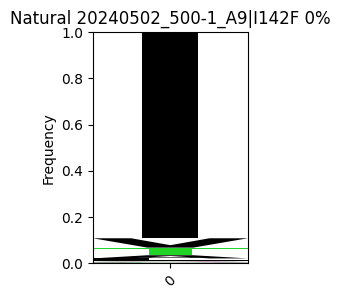

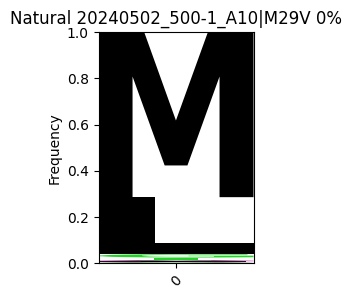

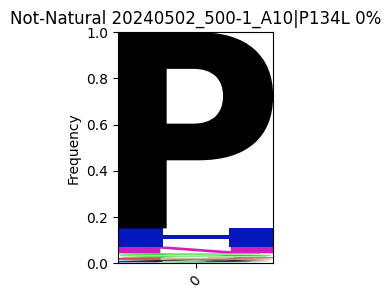

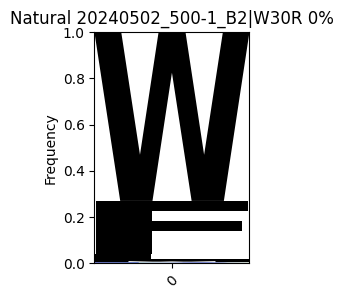

20240502_500-1_B2|Q48*


<Figure size 200x300 with 0 Axes>

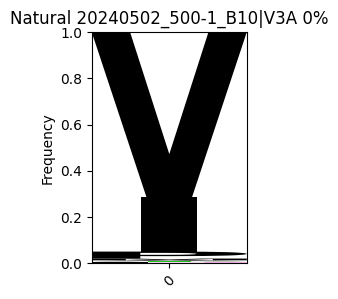

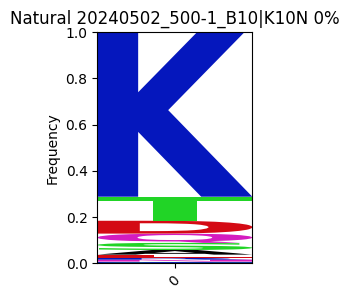

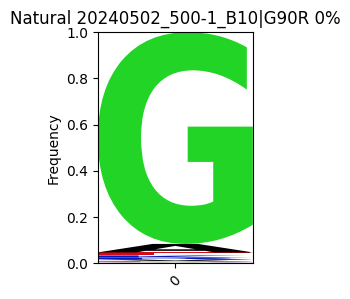

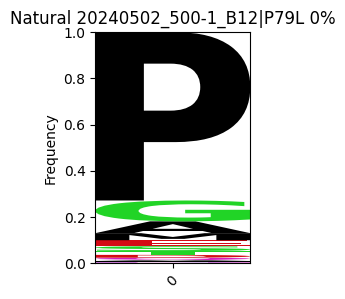

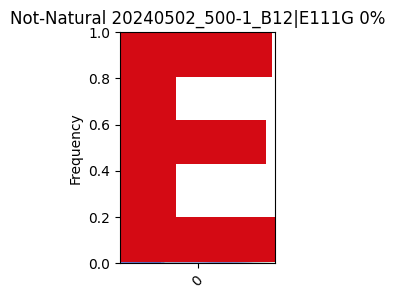

20240502_500-1_C4|L97*


<Figure size 200x300 with 0 Axes>

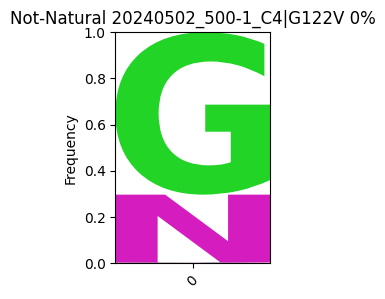

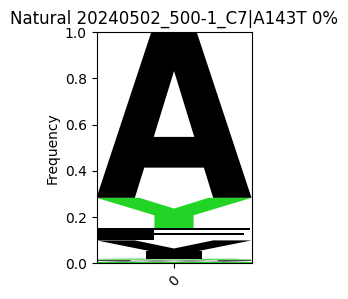

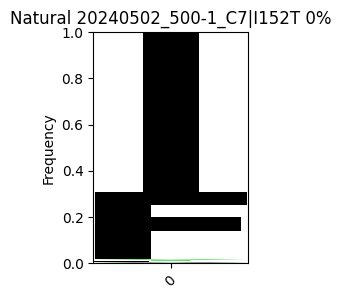

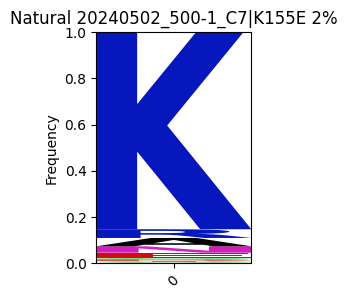

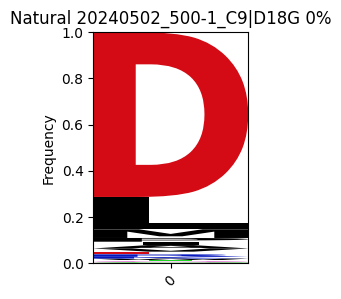

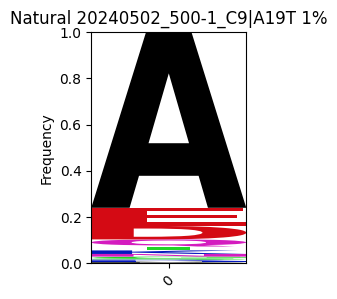

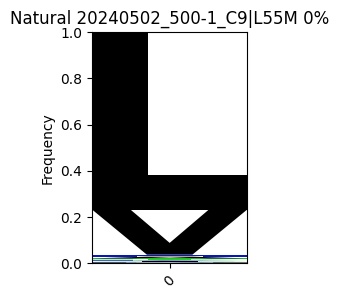

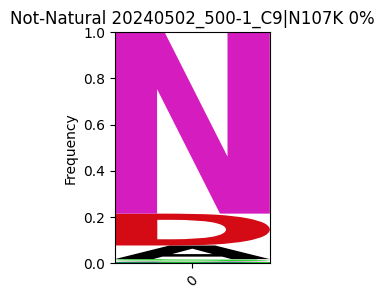

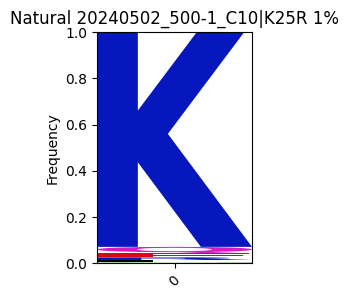

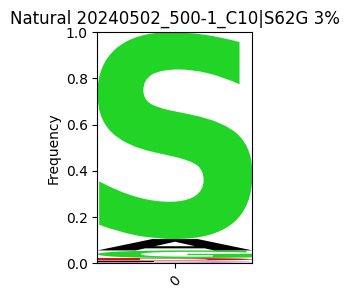

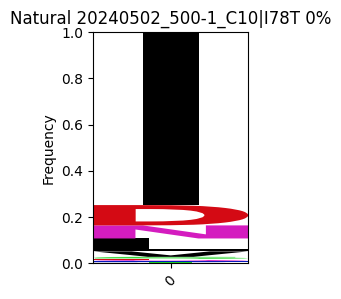

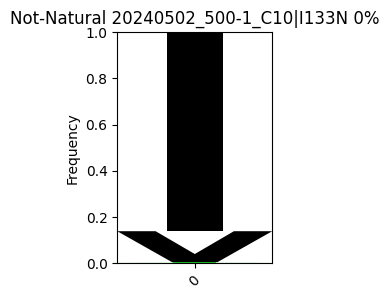

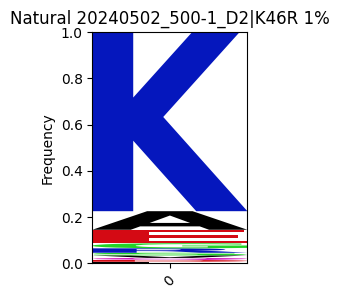

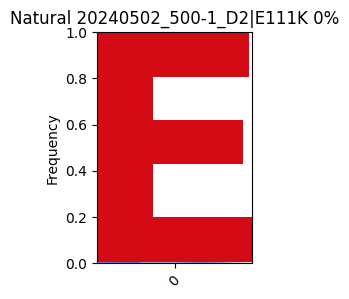

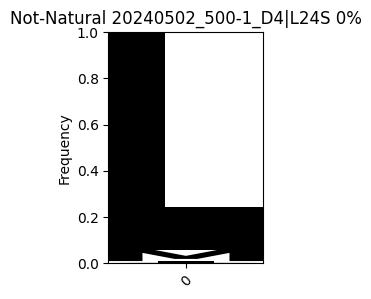

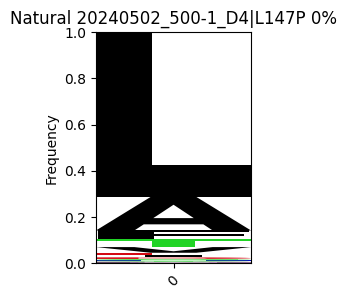

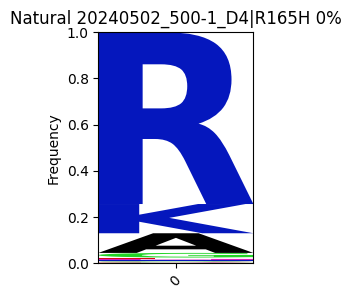

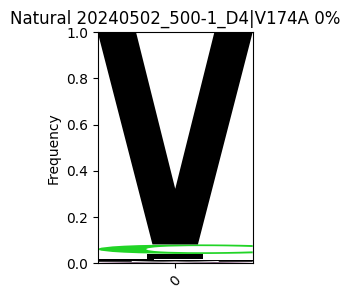

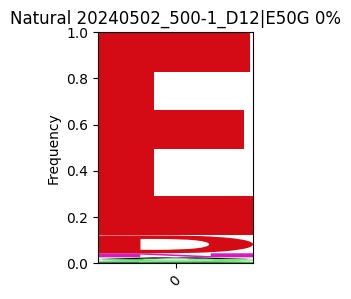

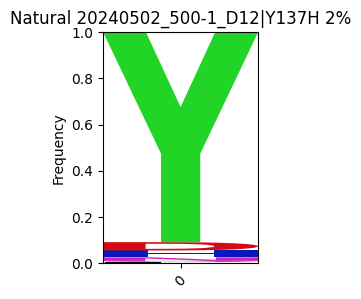

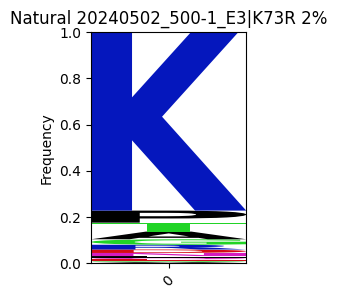

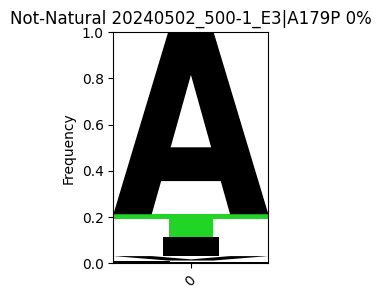

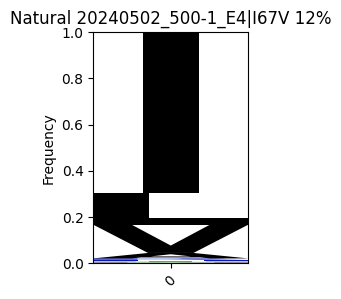

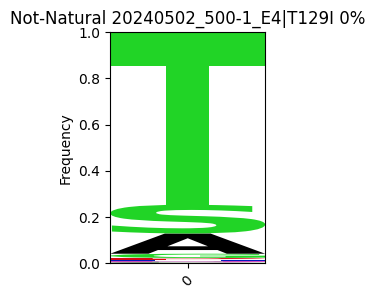

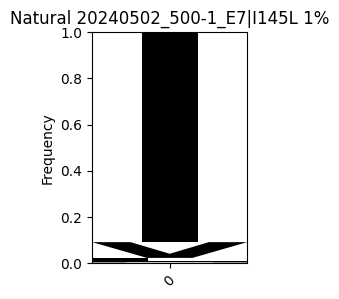

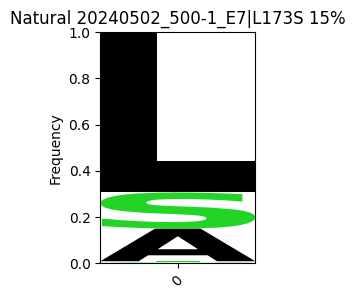

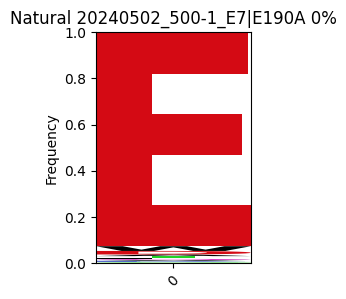

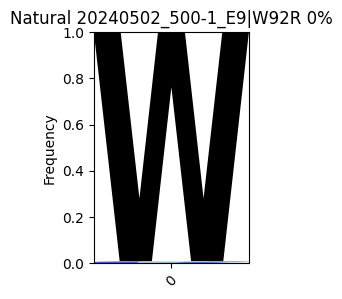

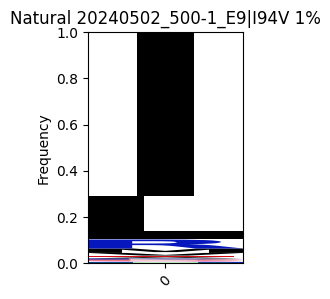

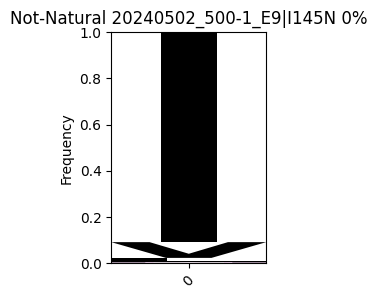

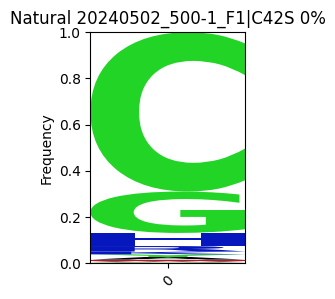

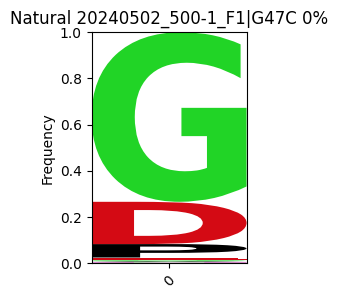

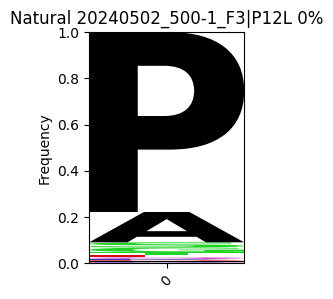

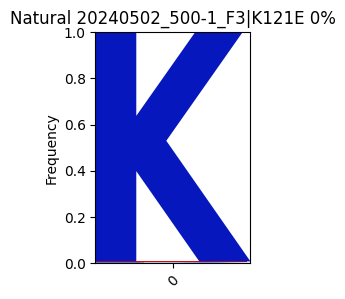

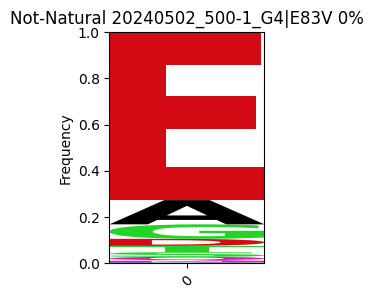

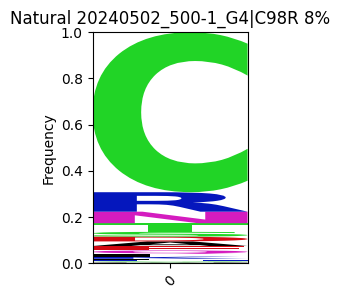

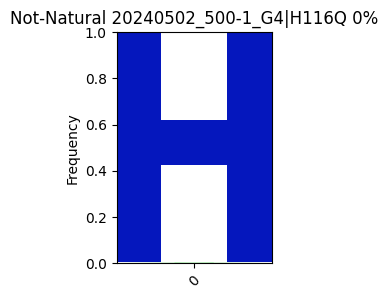

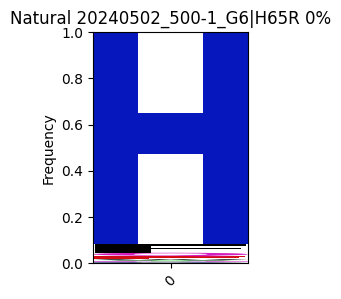

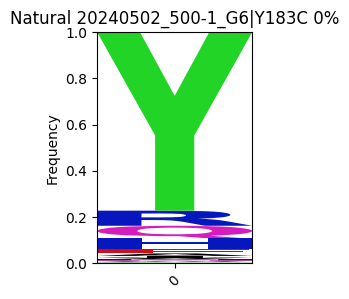

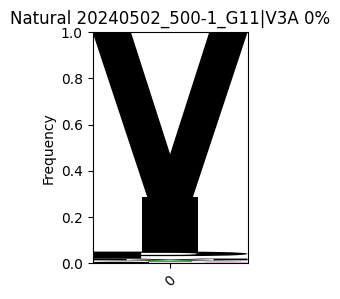

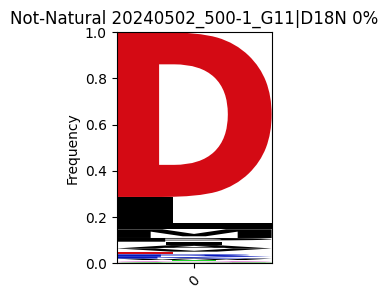

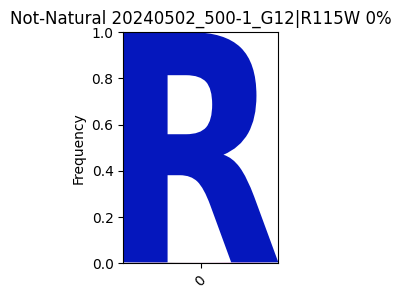

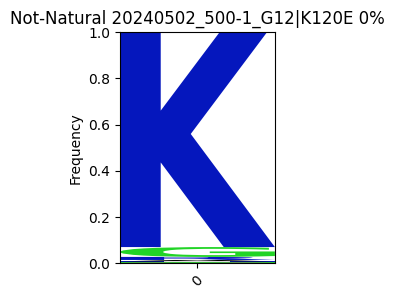

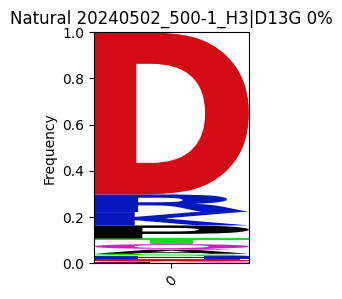

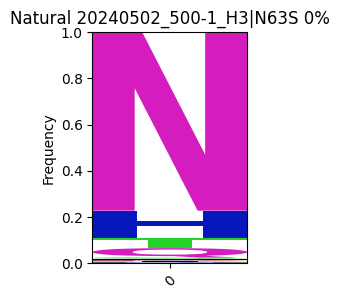

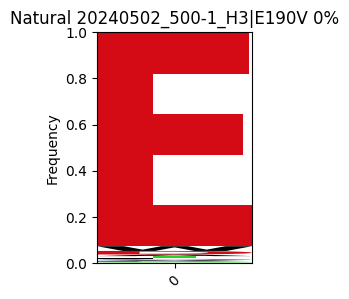

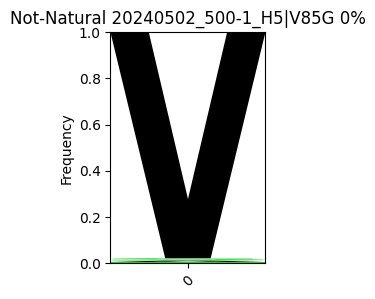

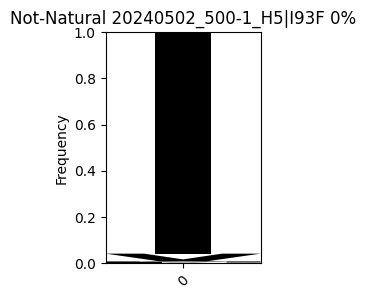

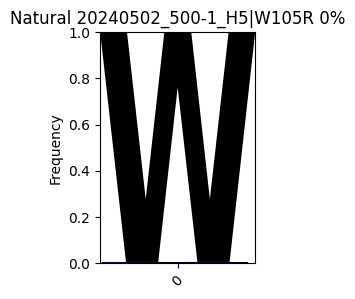

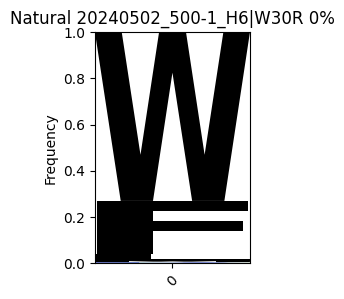

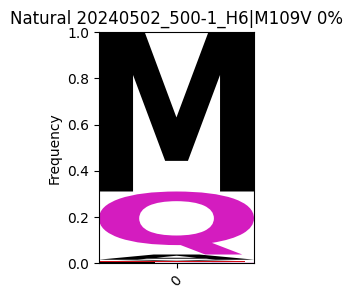

20240502_500-1_H6|S182*


<Figure size 200x300 with 0 Axes>

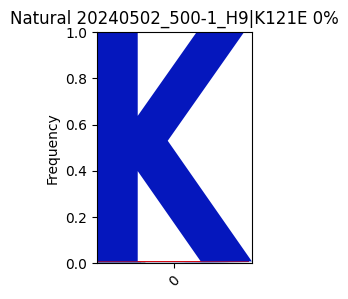

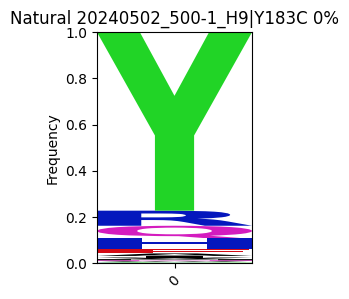

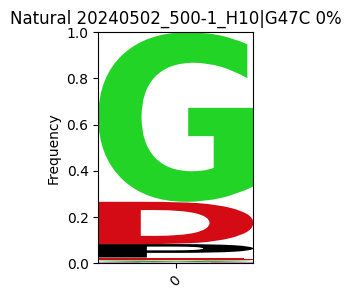

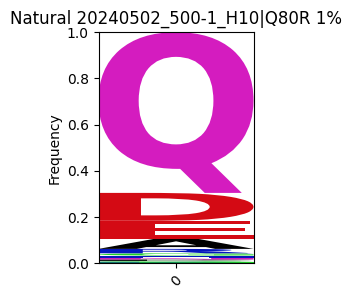

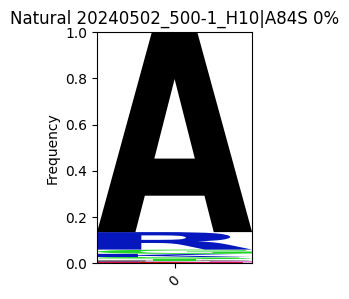

20240502_500-1_H10|W92*


<Figure size 200x300 with 0 Axes>

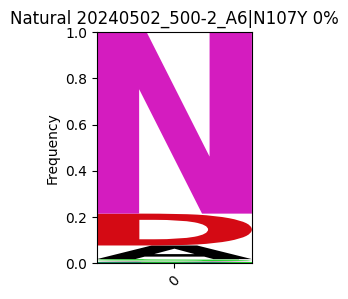

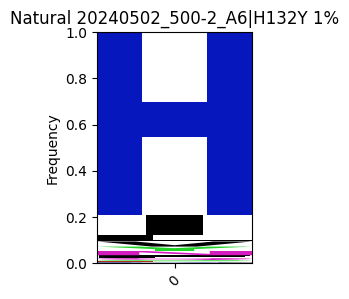

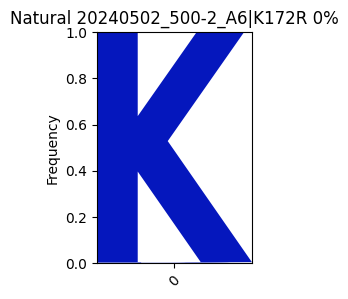

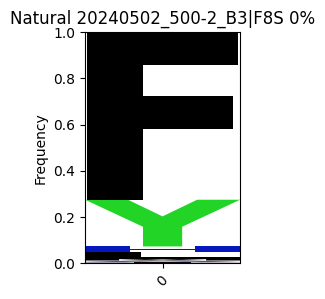

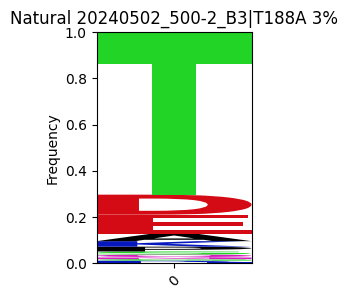

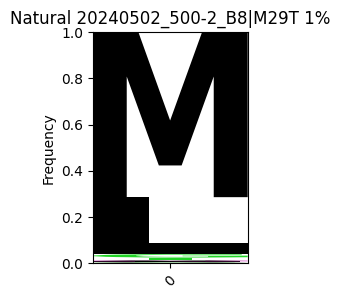

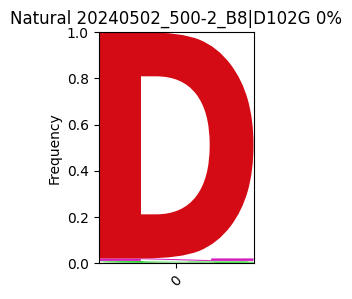

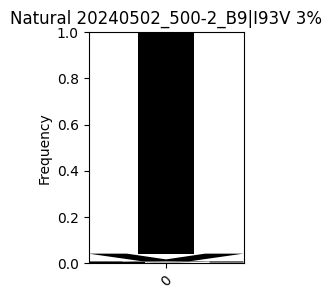

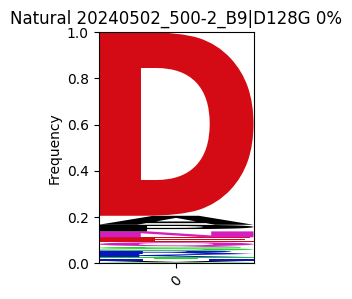

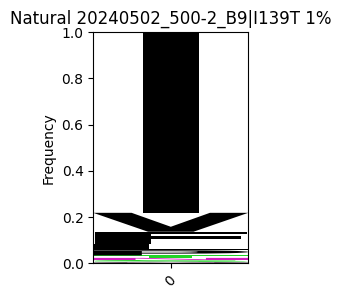

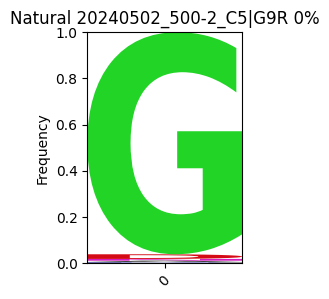

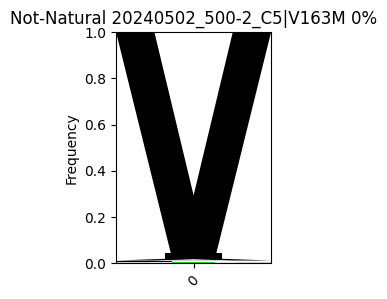

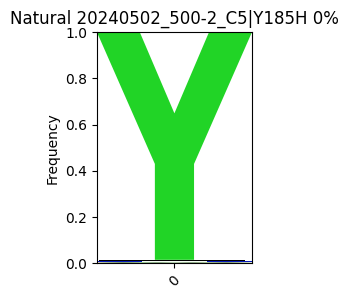

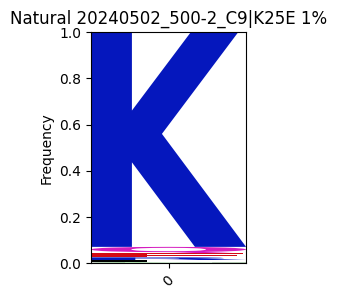

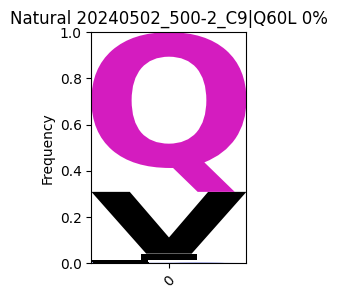

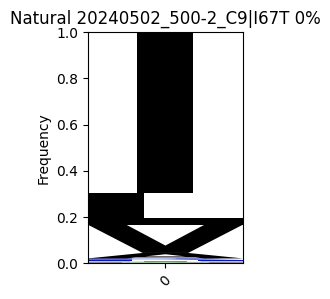

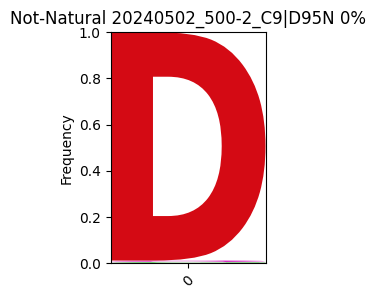

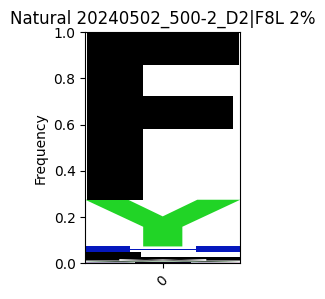

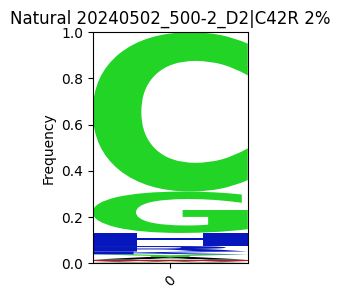

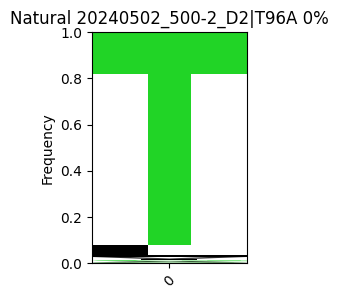

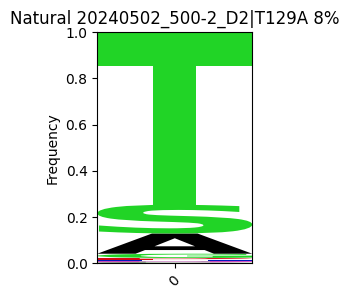

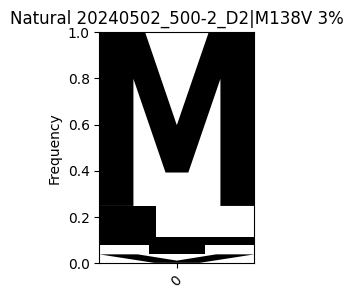

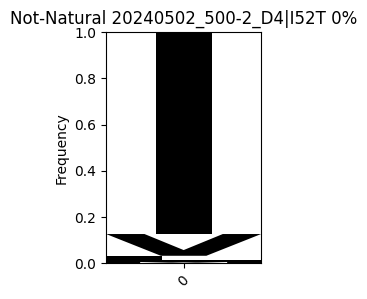

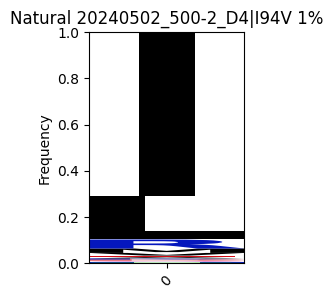

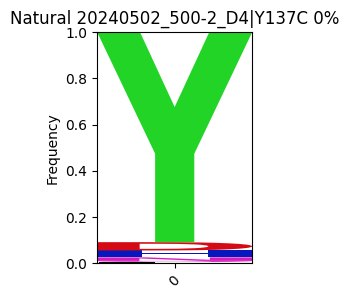

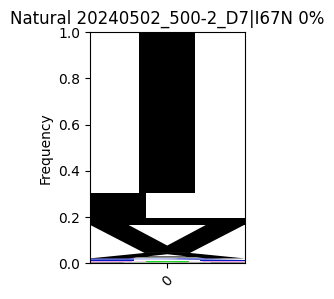

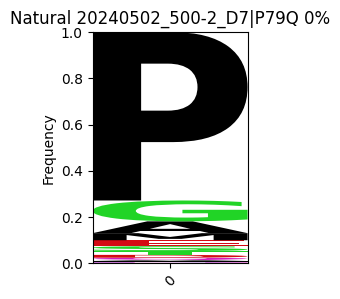

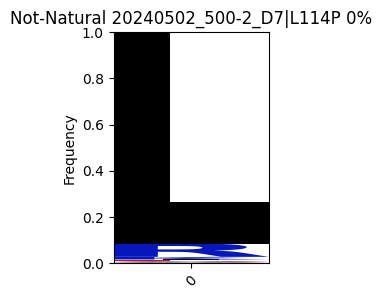

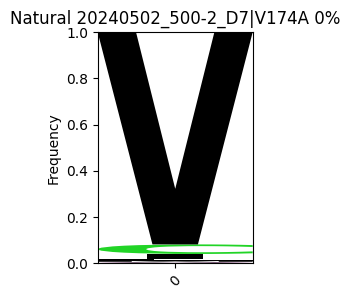

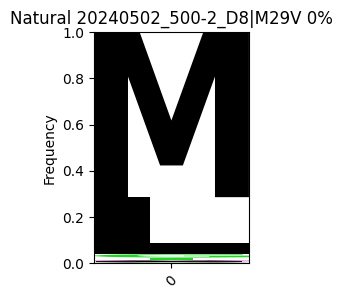

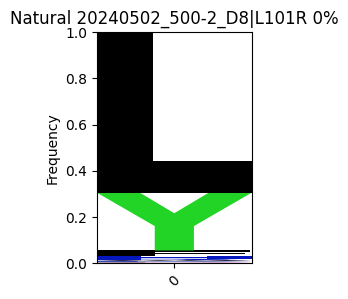

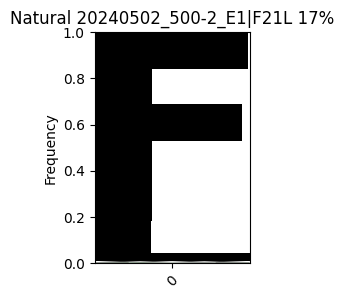

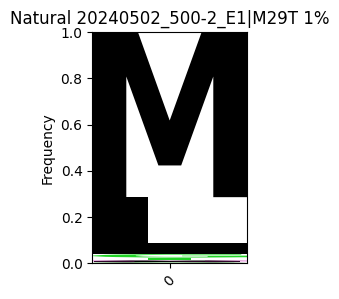

20240502_500-2_E1|Q177*


<Figure size 200x300 with 0 Axes>

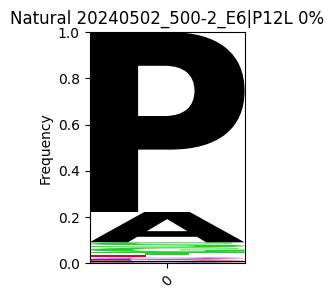

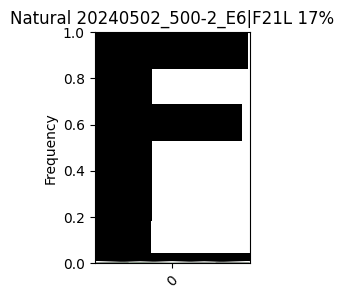

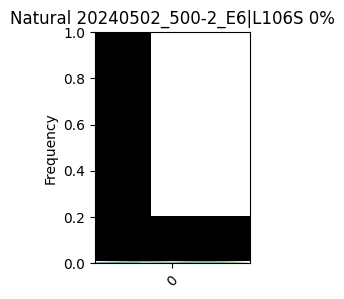

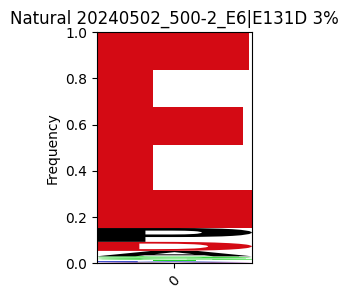

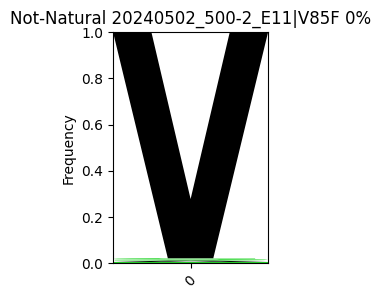

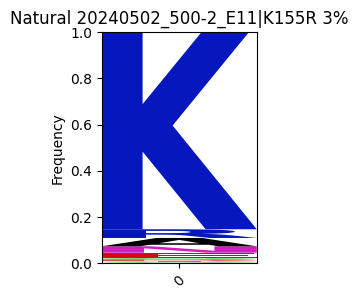

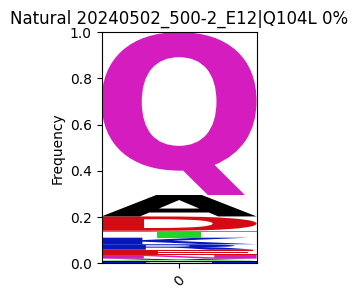

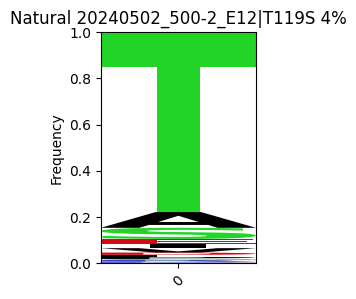

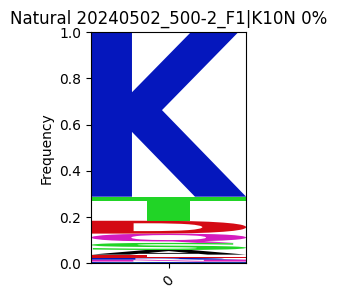

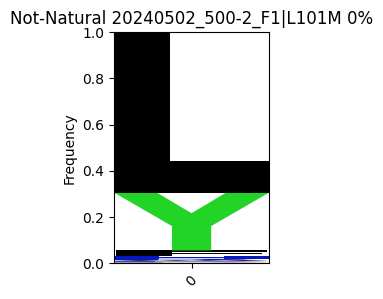

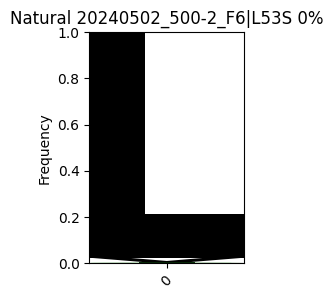

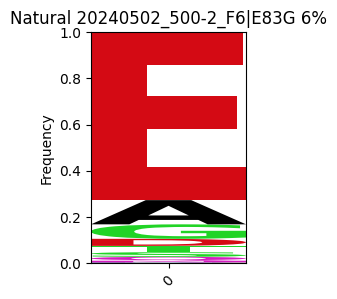

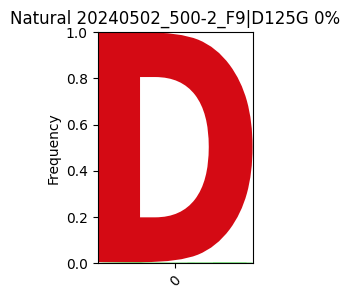

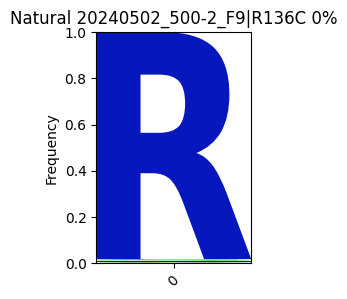

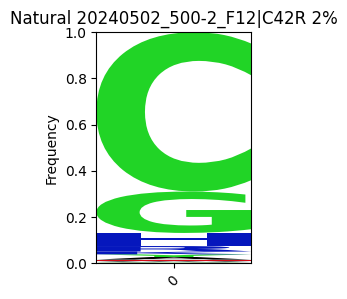

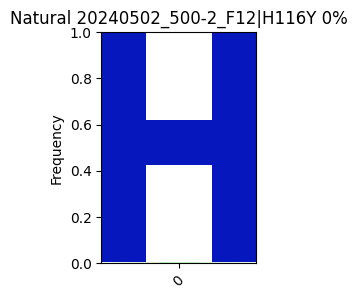

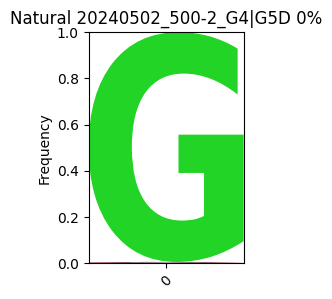

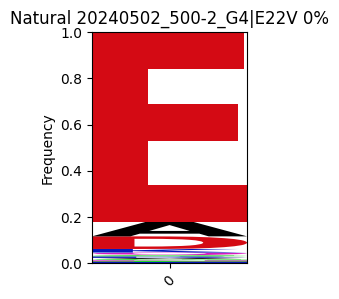

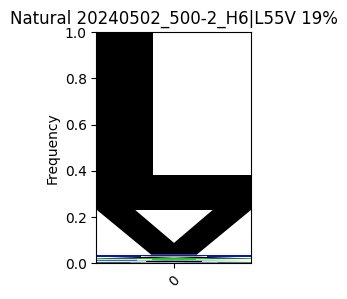

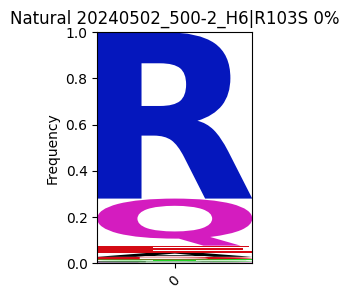

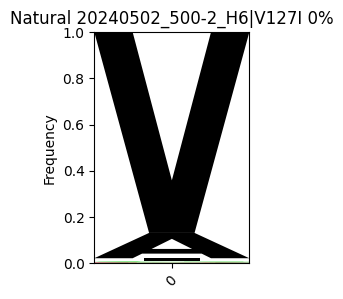

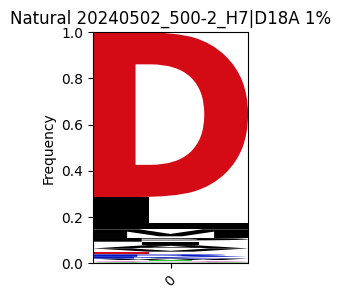

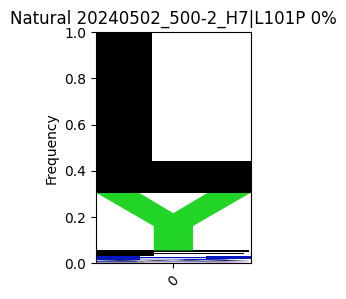

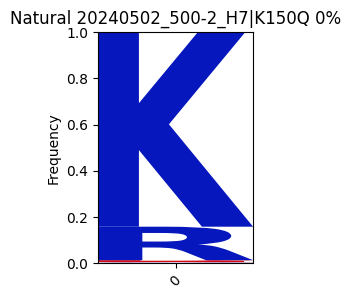

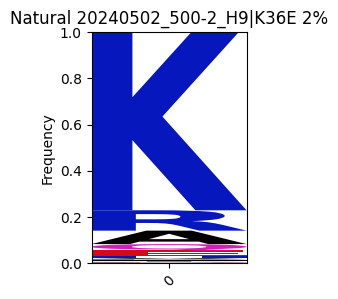

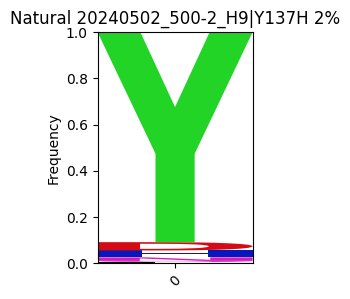

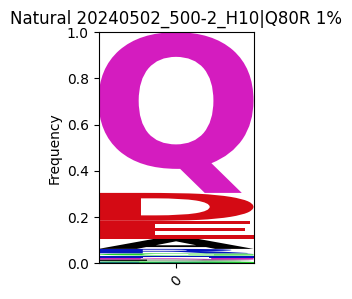

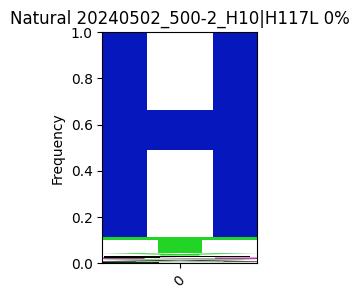

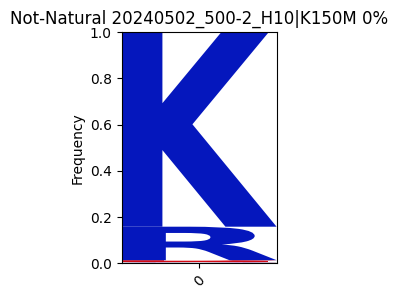

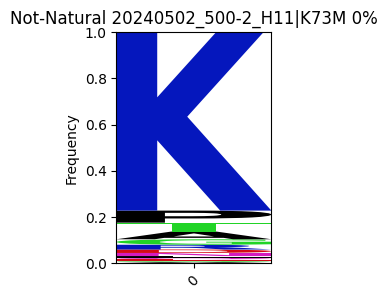

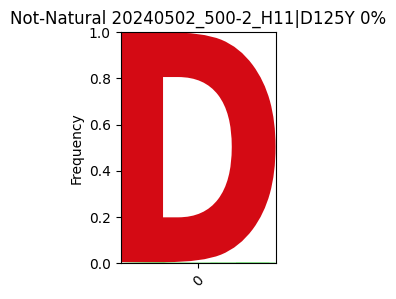

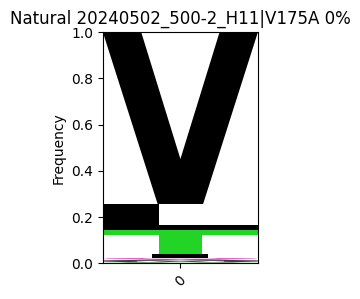

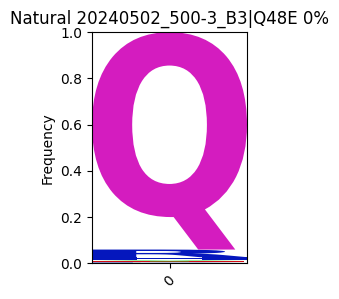

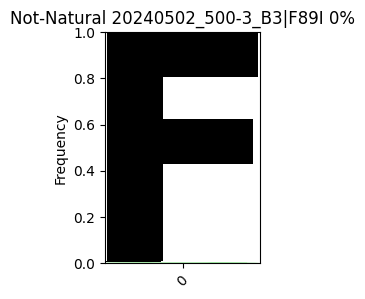

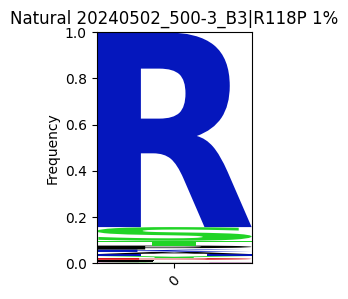

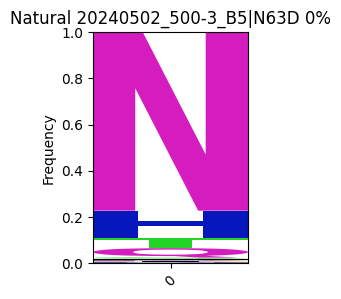

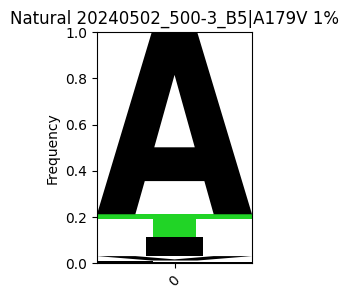

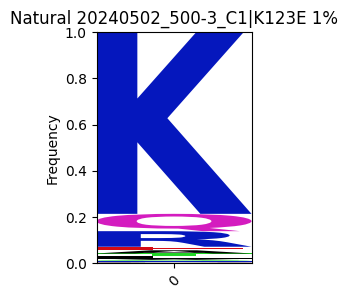

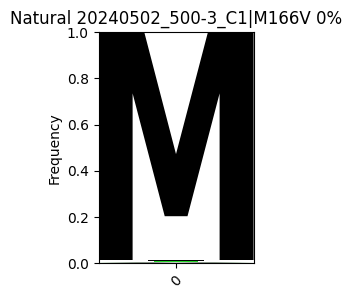

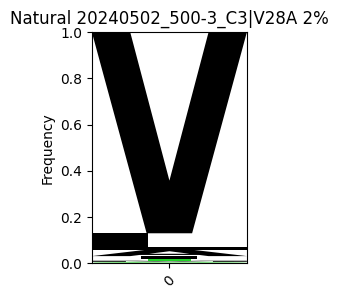

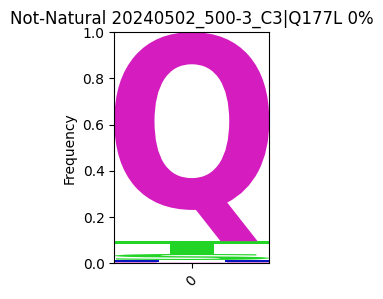

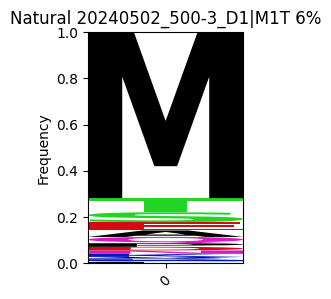

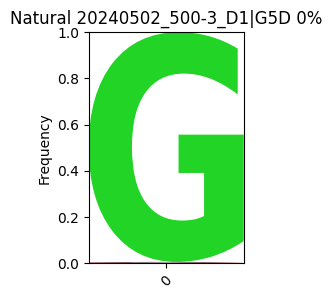

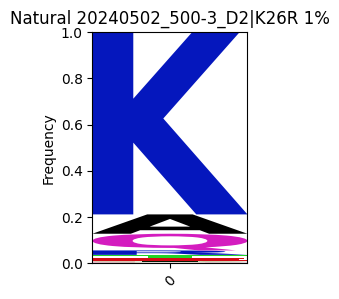

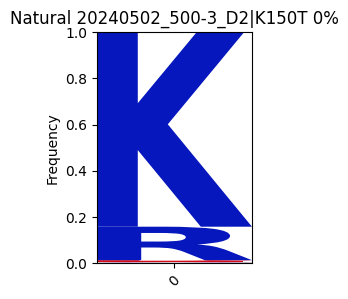

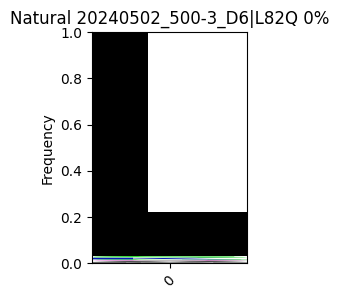

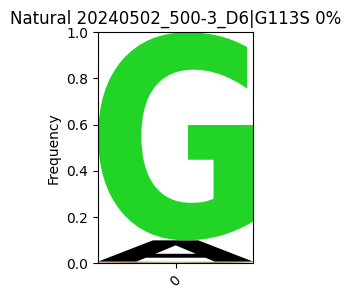

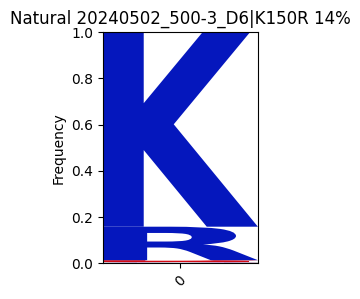

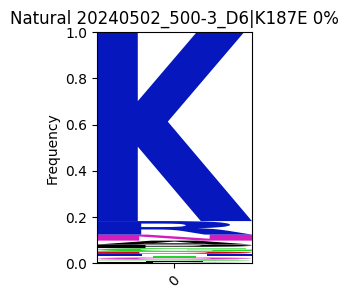

20240502_500-3_D7|E35*


<Figure size 200x300 with 0 Axes>

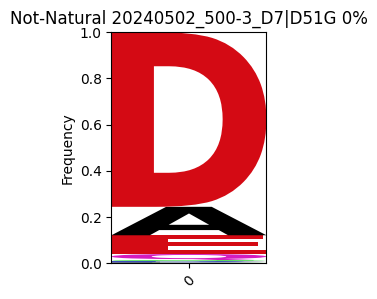

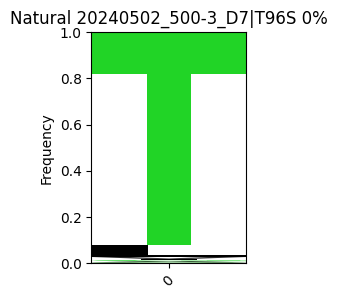

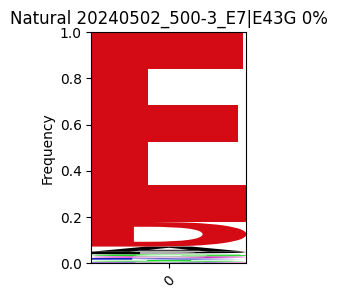

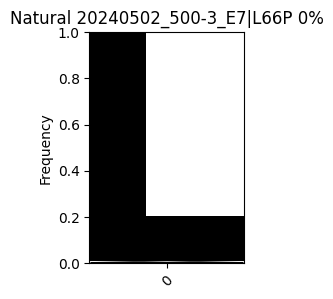

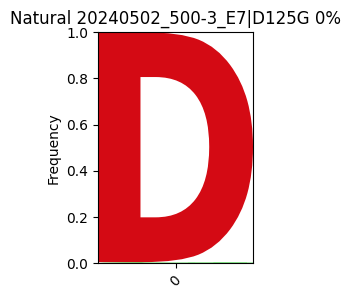

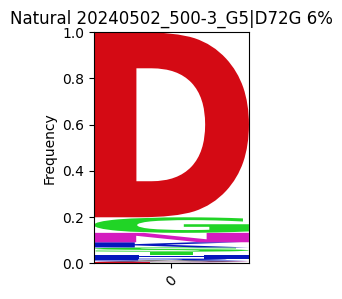

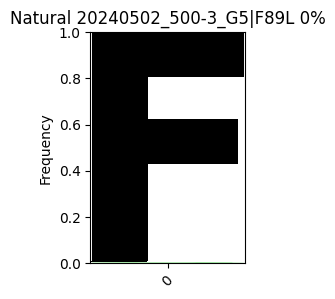

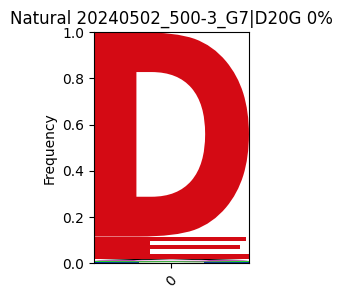

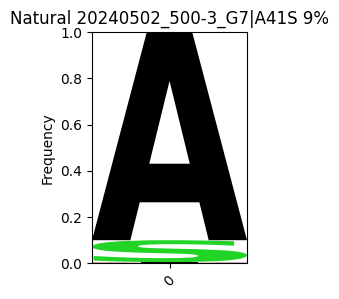

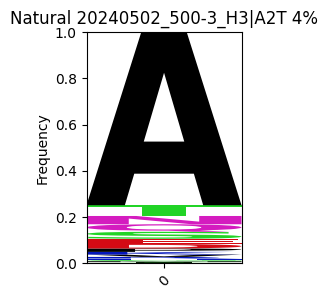

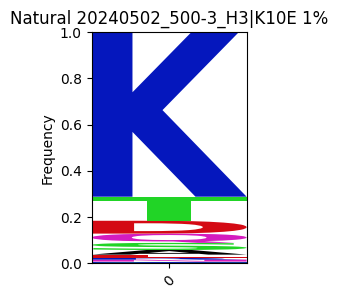

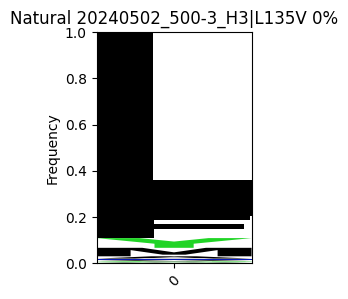

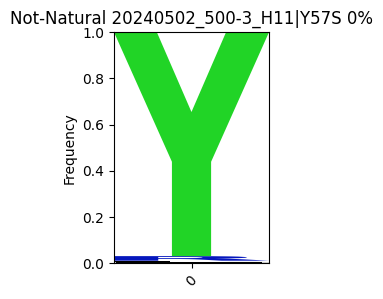

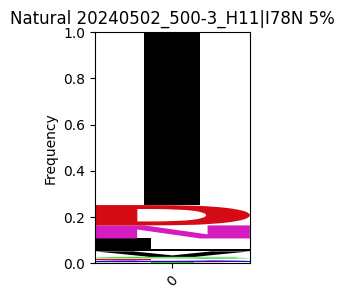

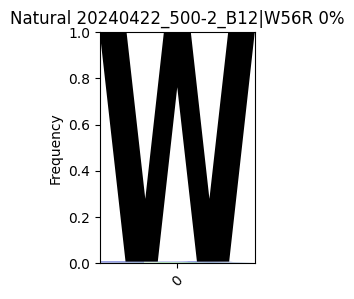

20240422_500-2_B12|L173*


<Figure size 200x300 with 0 Axes>

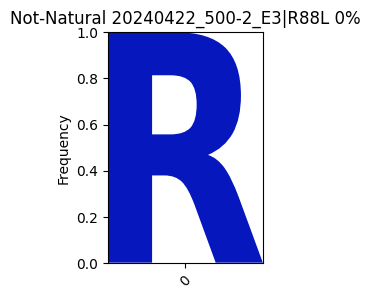

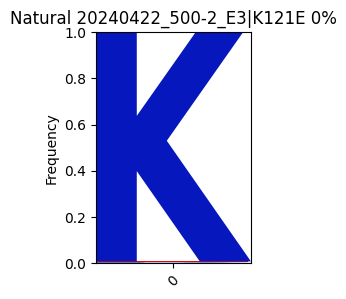

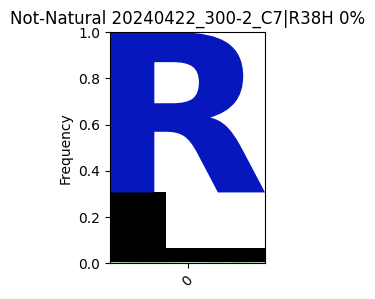

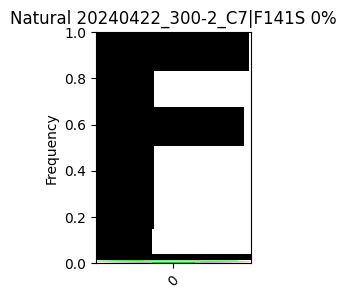

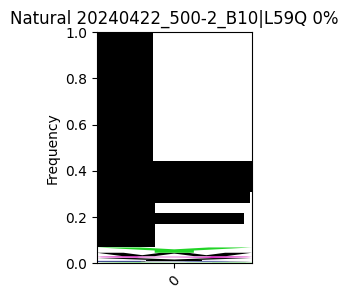

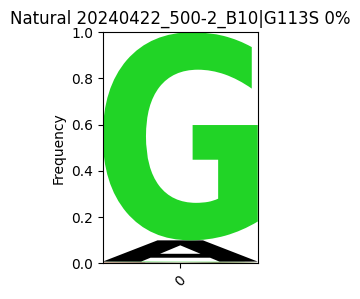

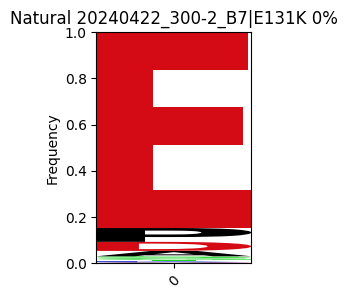

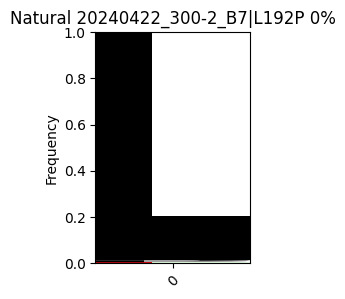

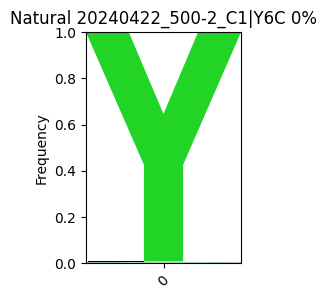

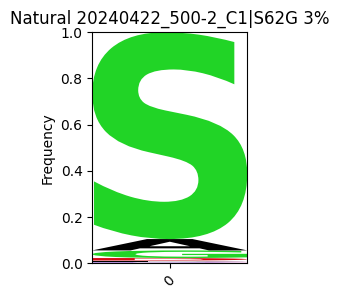

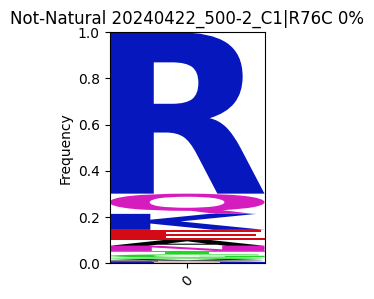

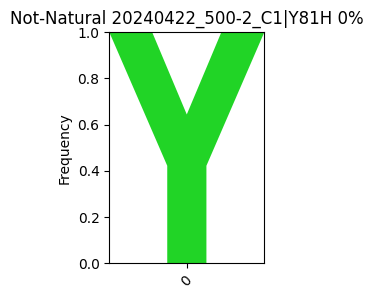

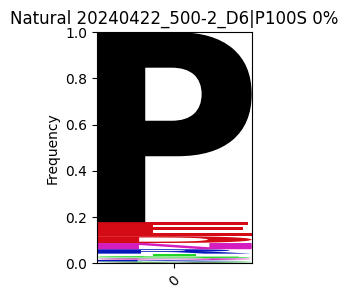

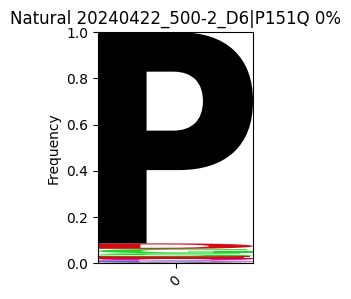

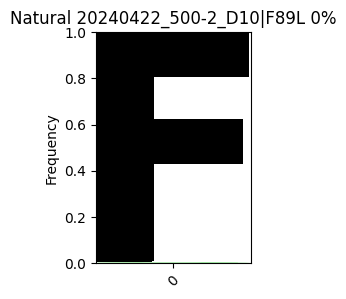

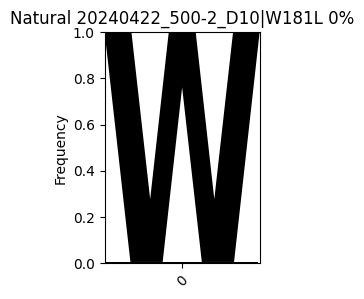

20240422_500-2_H5|K87*


<Figure size 200x300 with 0 Axes>

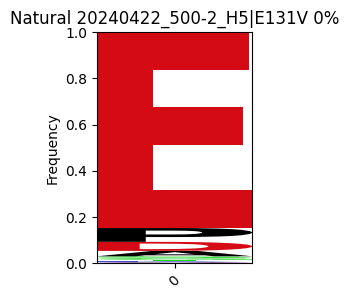

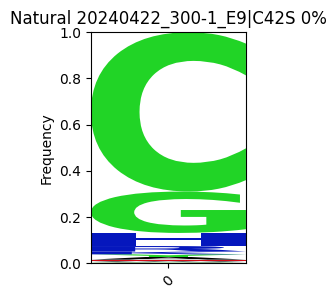

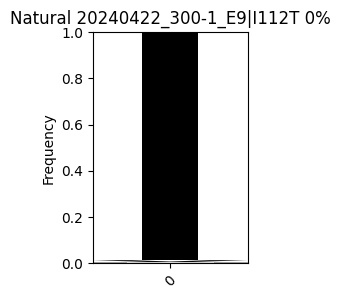

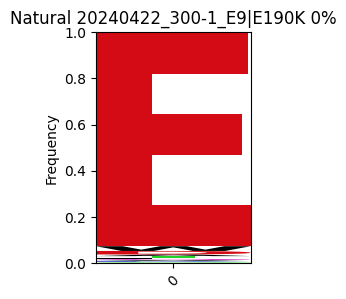

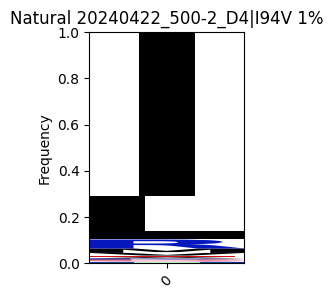

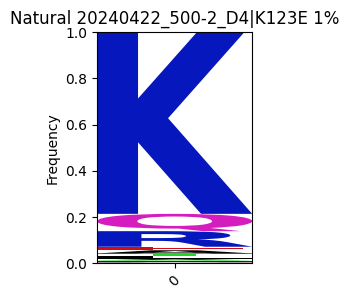

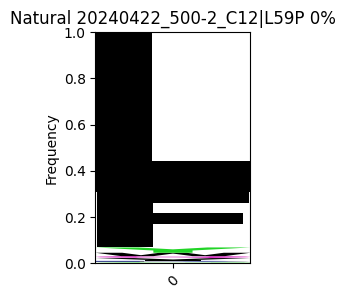

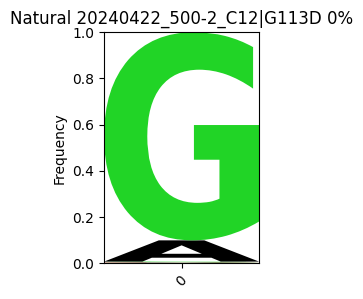

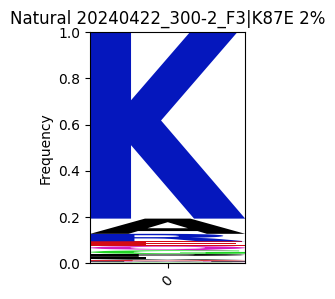

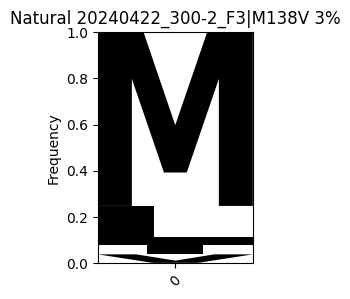

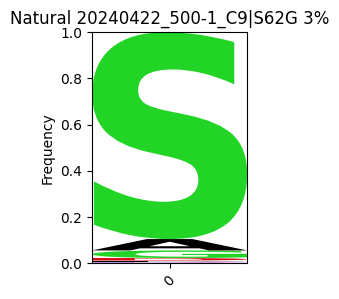

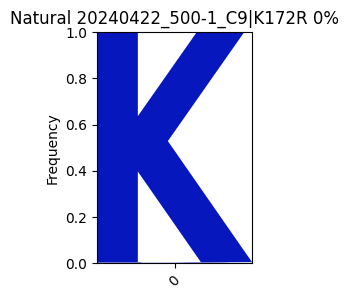

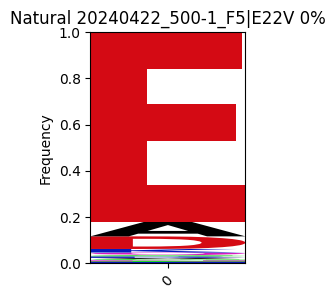

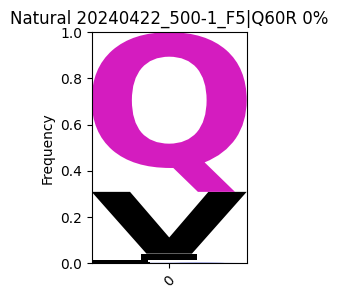

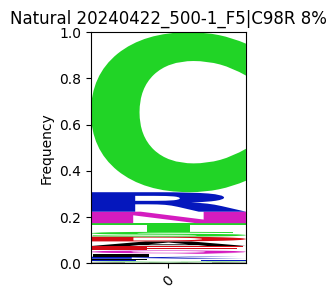

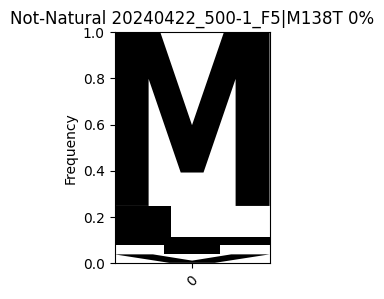

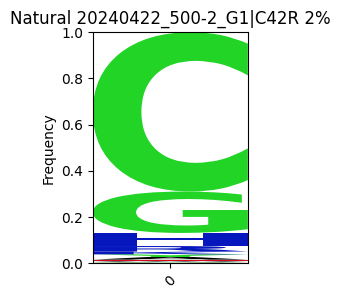

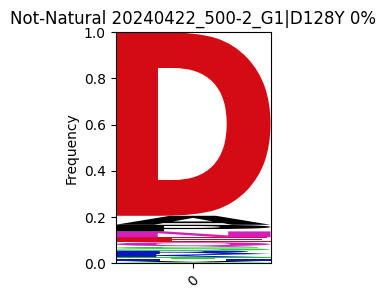

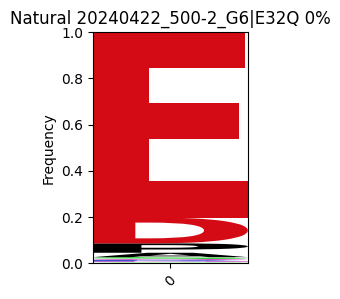

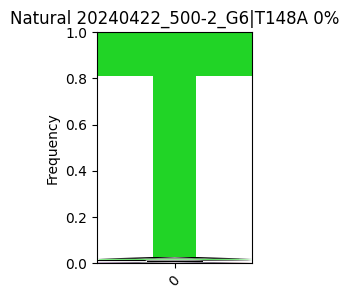

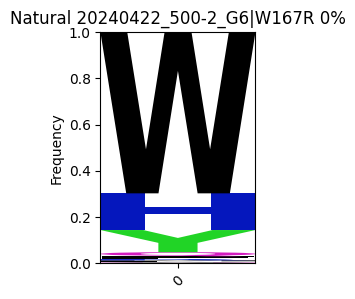

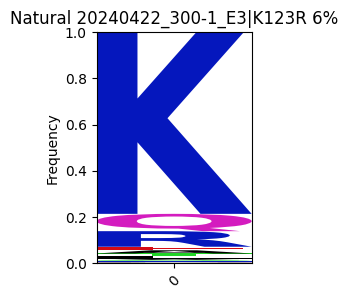

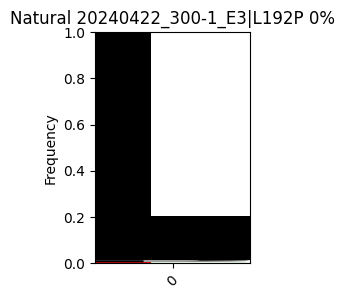

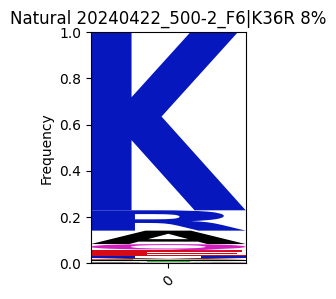

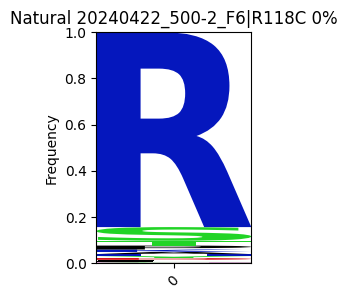

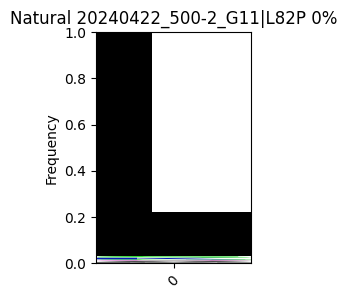

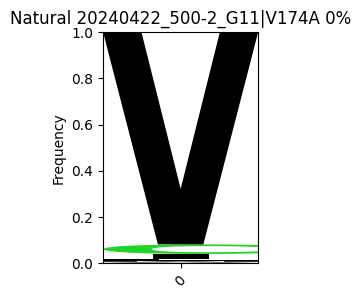

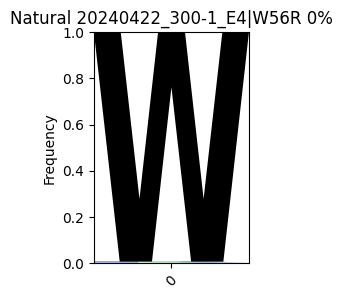

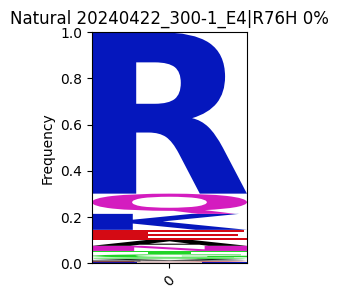

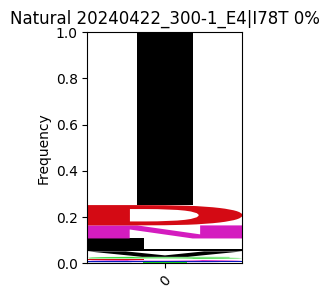

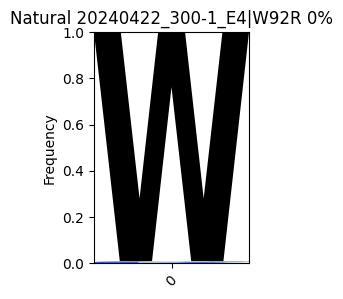

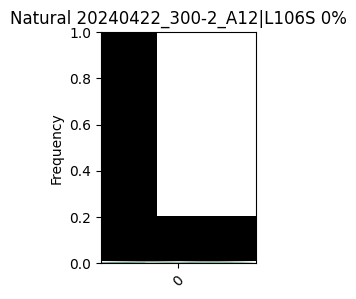

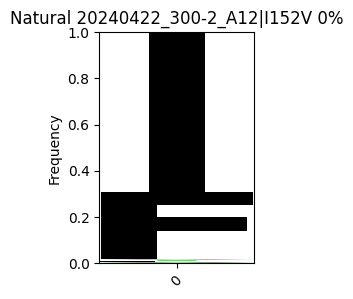

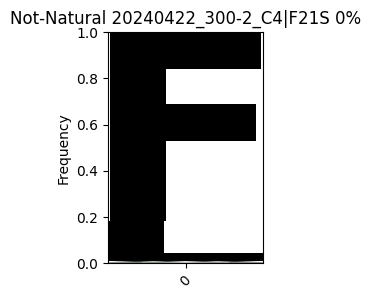

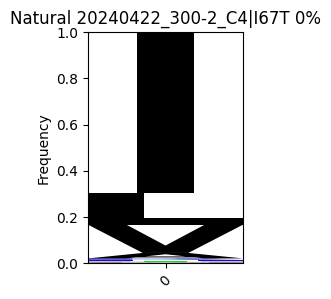

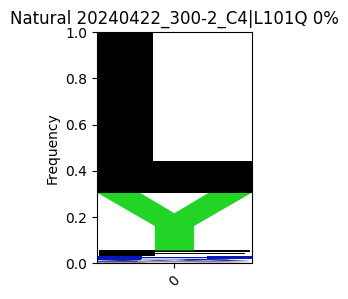

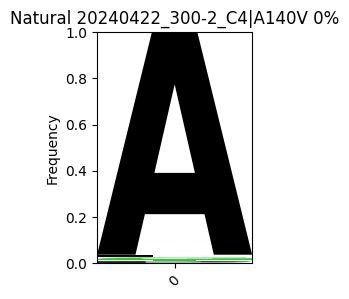

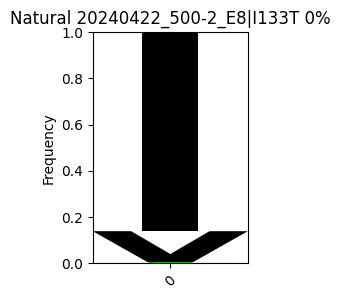

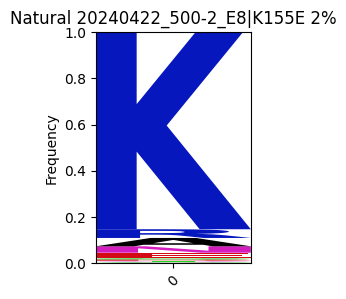

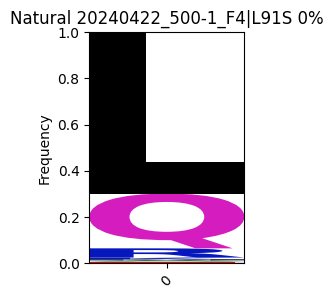

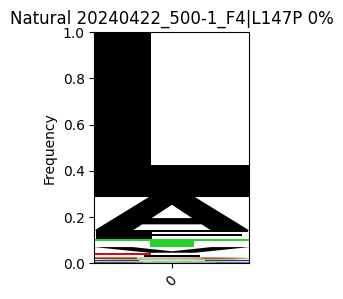

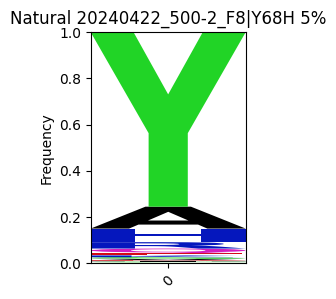

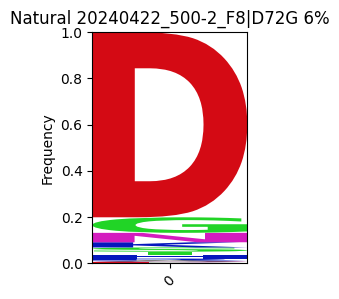

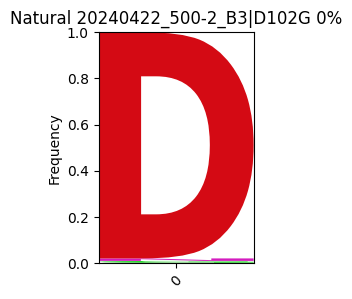

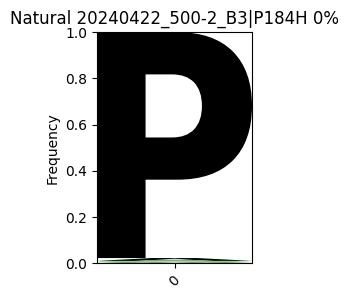

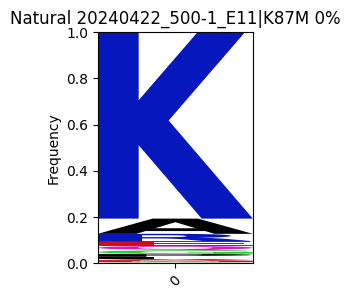

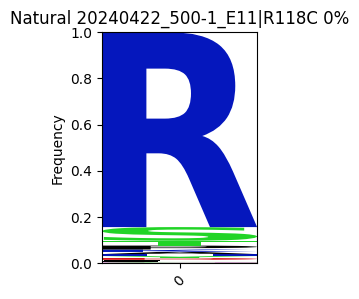

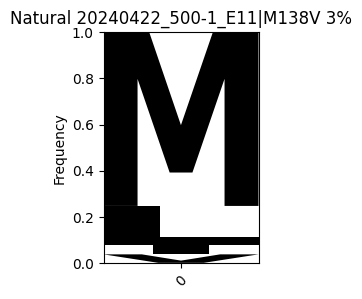

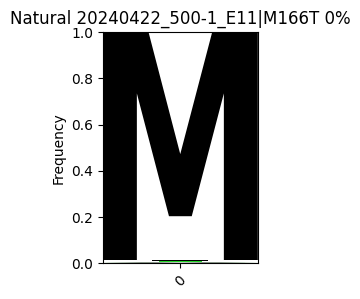

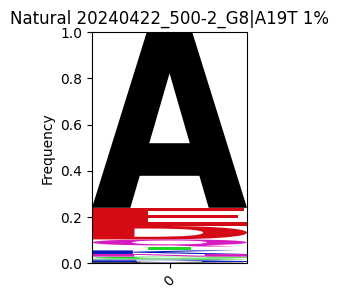

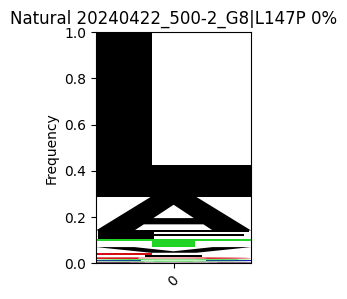

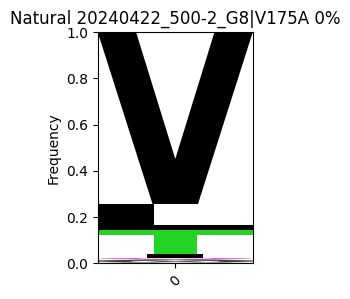

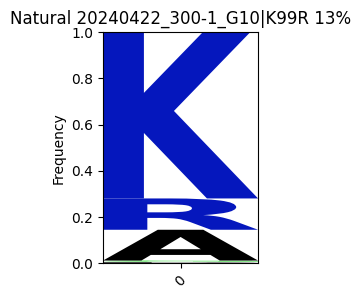

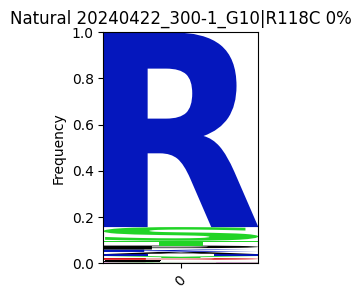

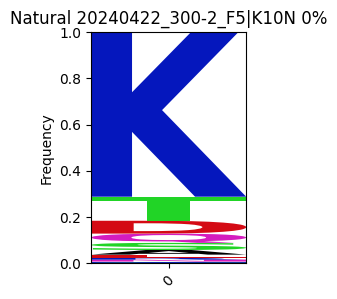

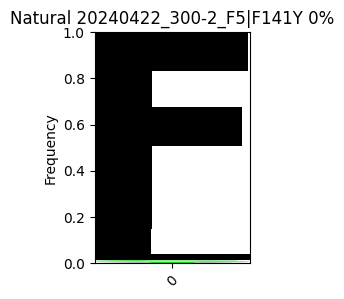

20240422_300-1_A11|E33*


<Figure size 200x300 with 0 Axes>

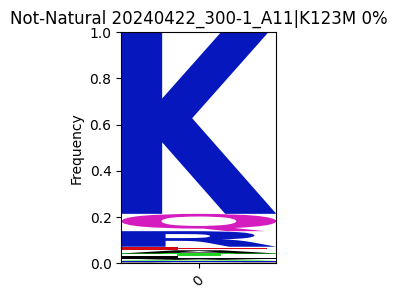

20240422_300-1_B9|W30*


<Figure size 200x300 with 0 Axes>

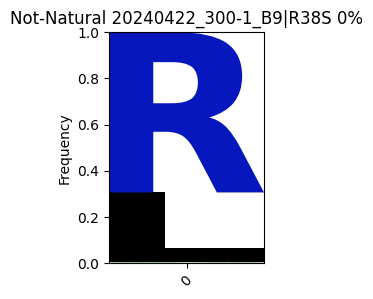

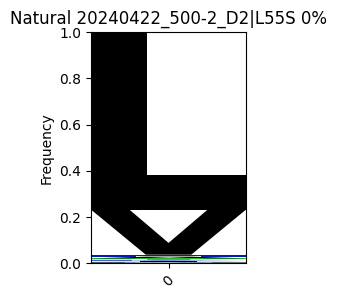

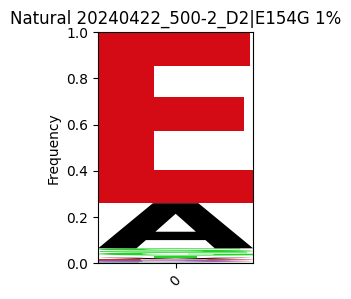

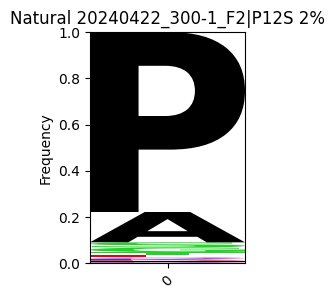

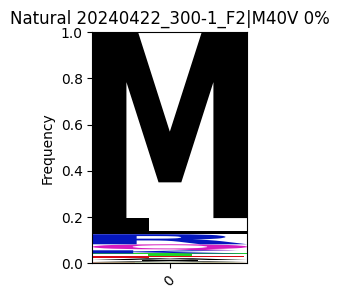

20240422_300-1_F2|W56*
20240422_300-1_G6|Y57*


<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

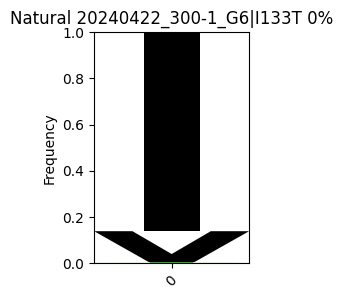

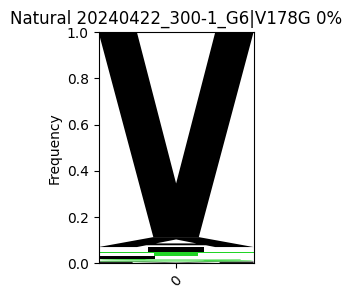

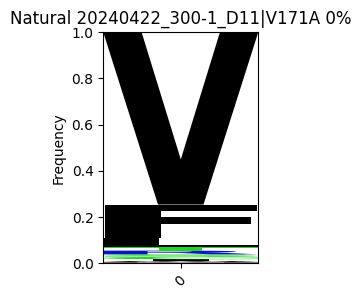

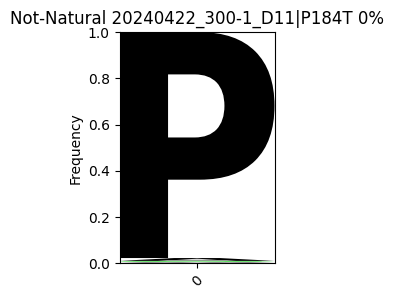

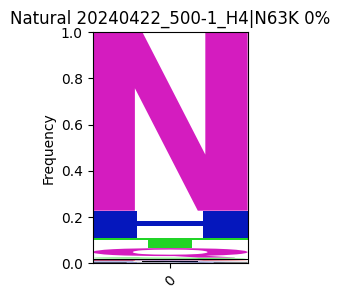

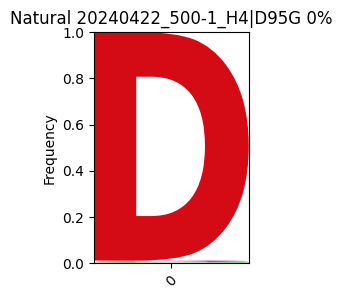

20240422_500-1_G10|W92*


<Figure size 200x300 with 0 Axes>

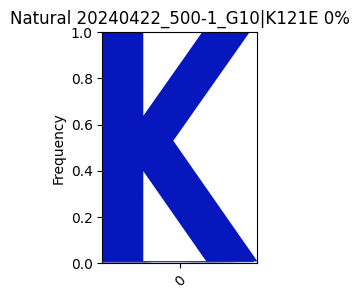

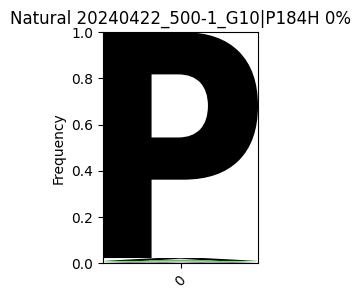

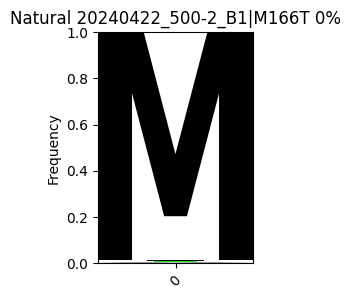

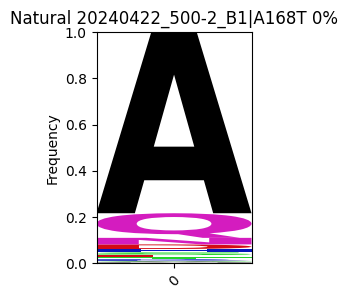

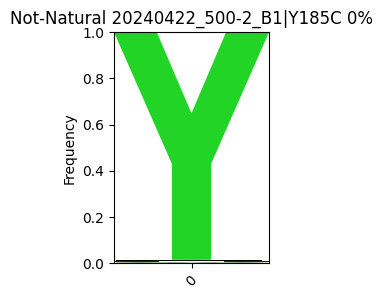

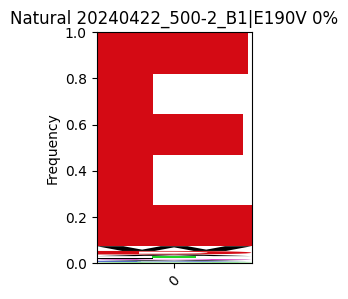

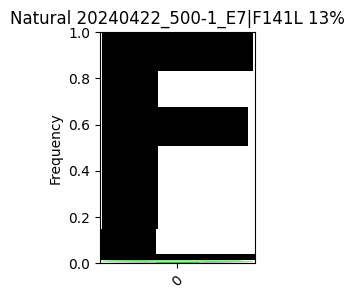

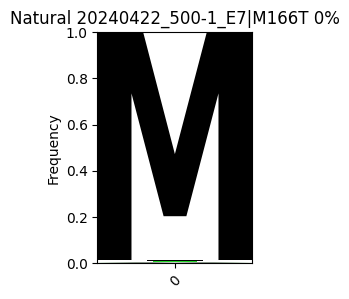

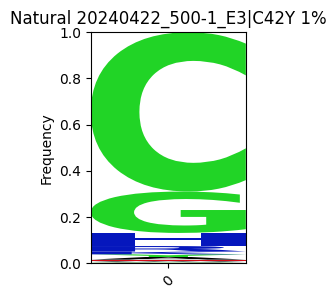

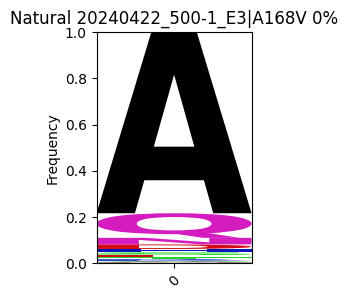

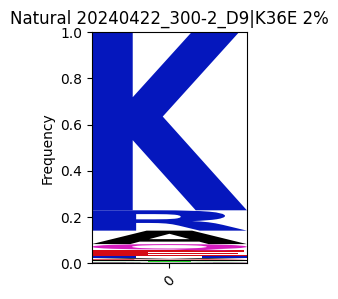

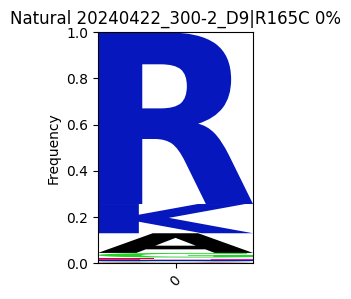

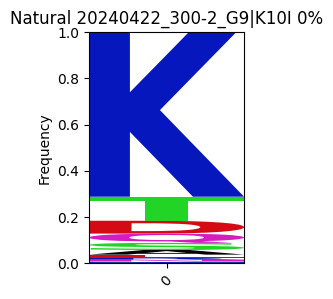

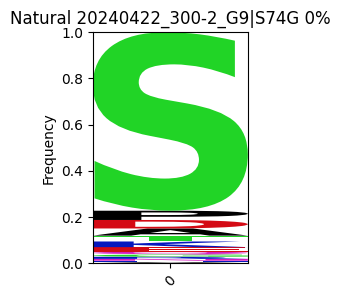

20240422_300-1_B12|K73*


<Figure size 200x300 with 0 Axes>

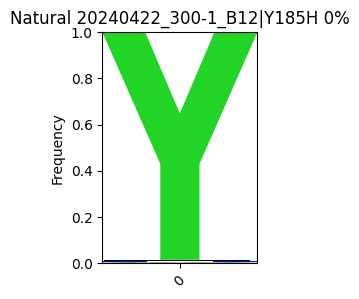

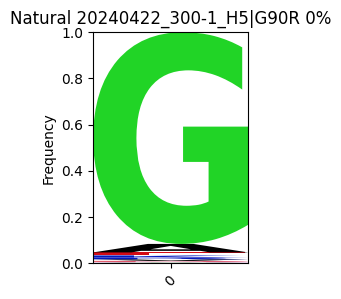

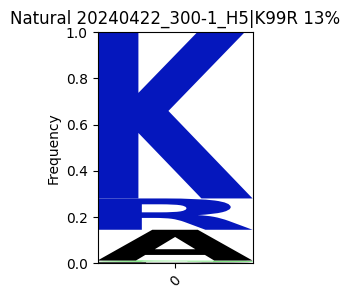

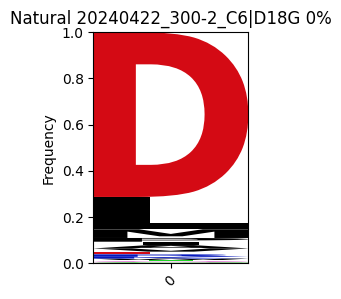

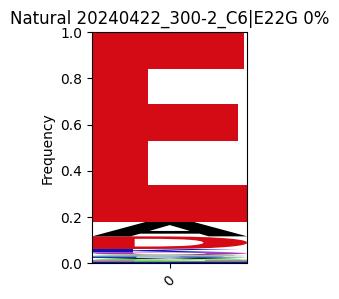

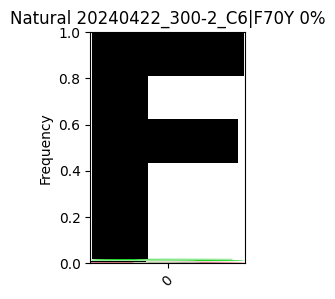

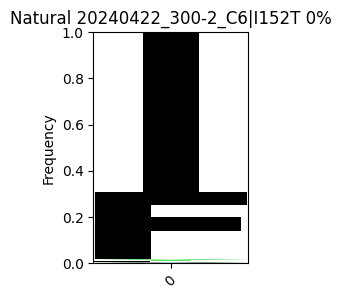

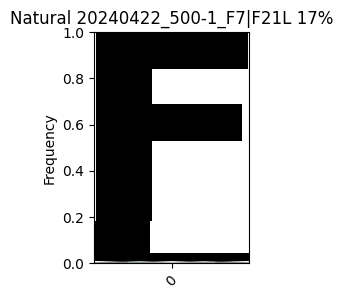

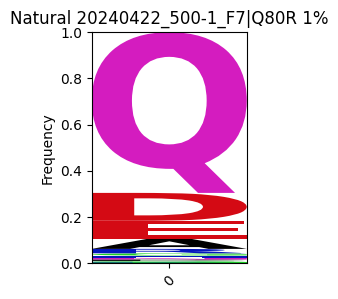

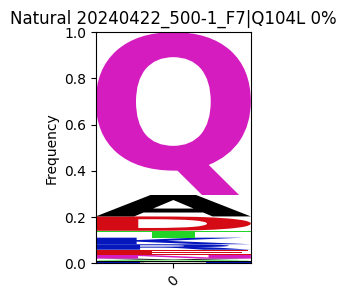

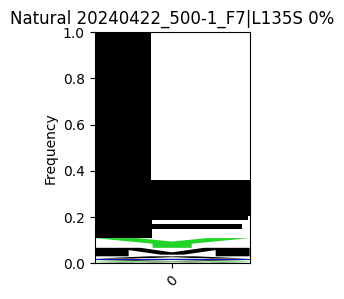

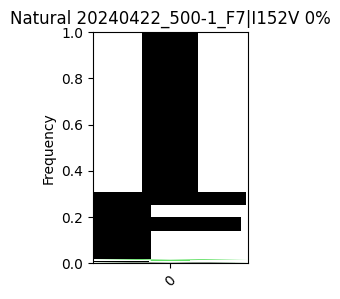

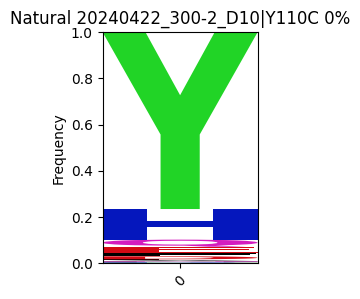

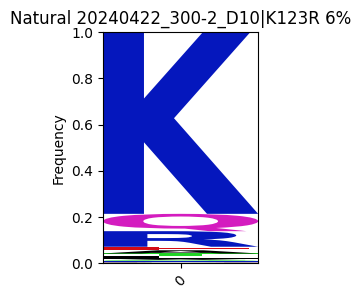

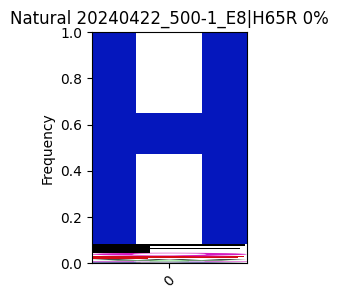

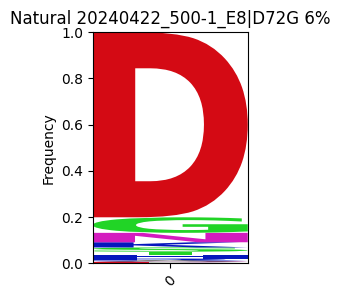

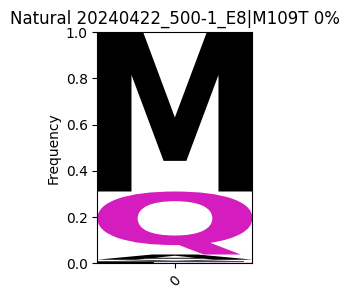

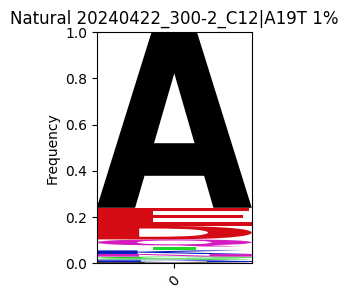

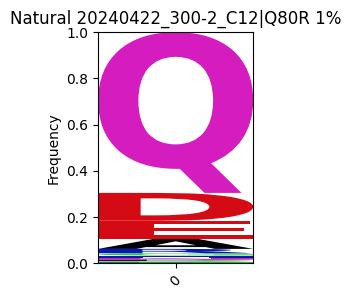

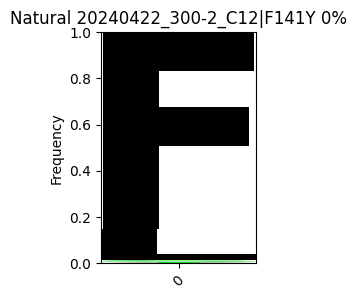

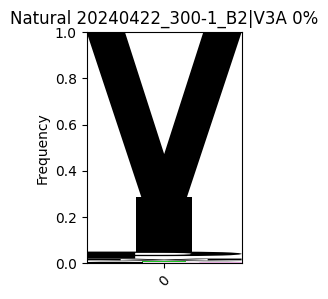

20240422_300-1_B2|Q104*


<Figure size 200x300 with 0 Axes>

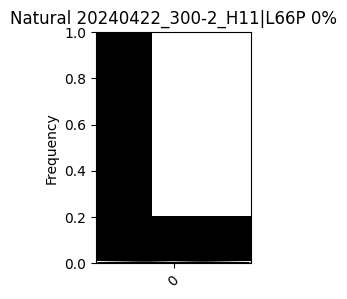

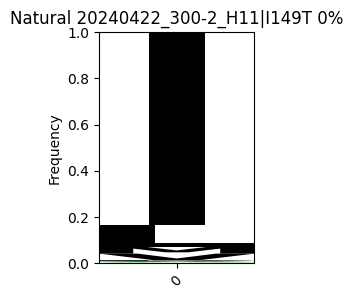

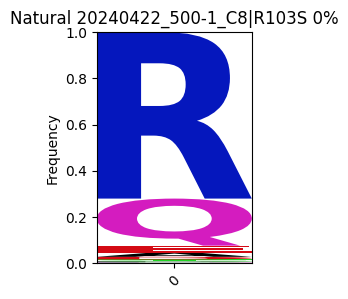

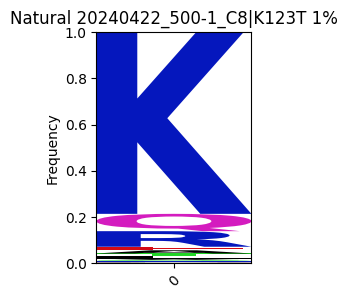

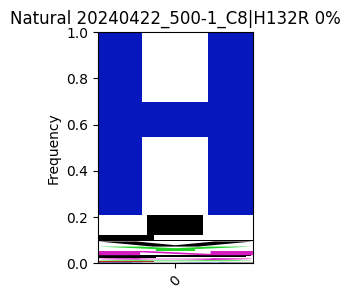

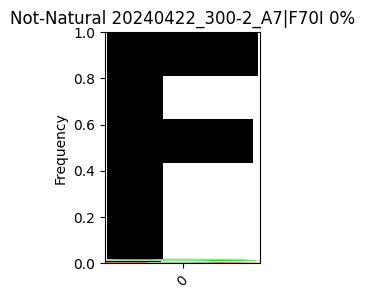

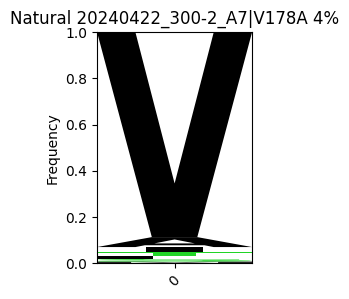

20240422_300-2_B12|K10*


<Figure size 200x300 with 0 Axes>

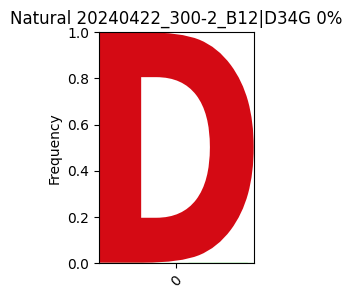

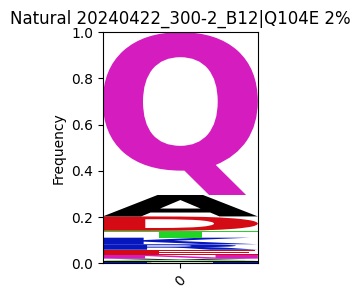

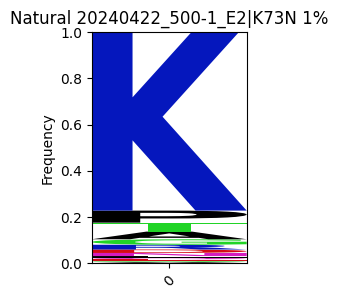

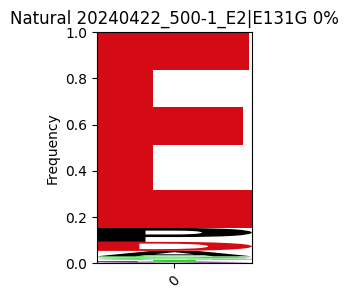

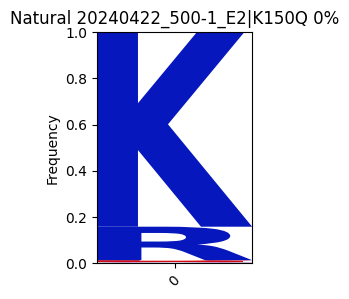

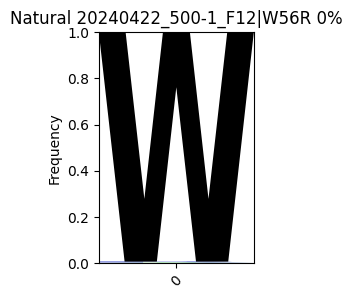

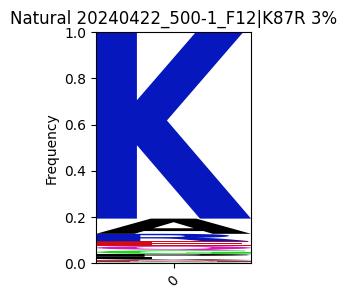

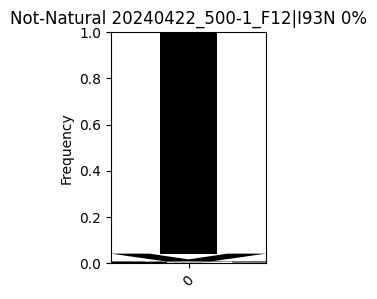

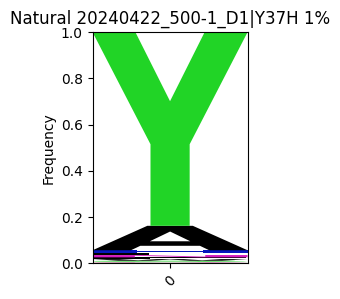

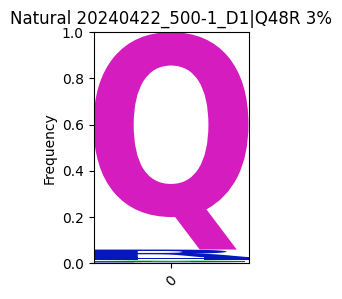

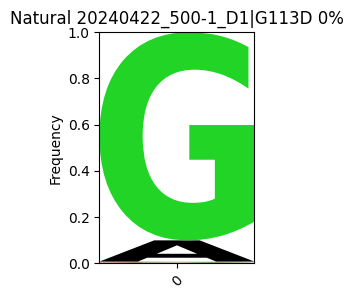

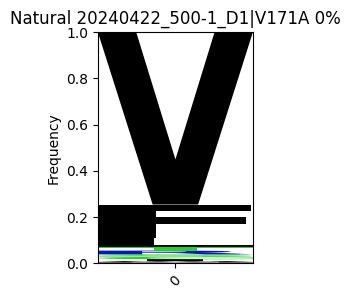

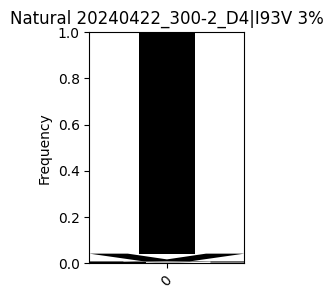

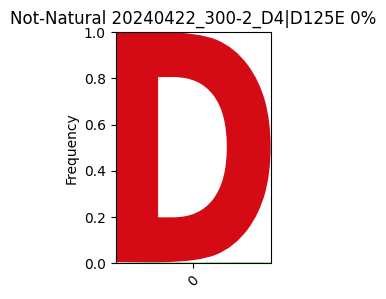

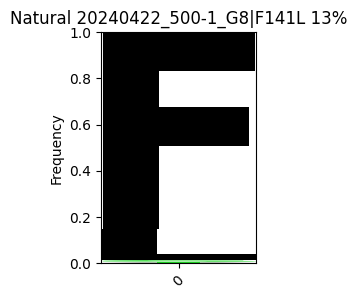

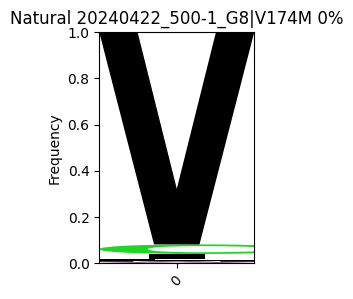

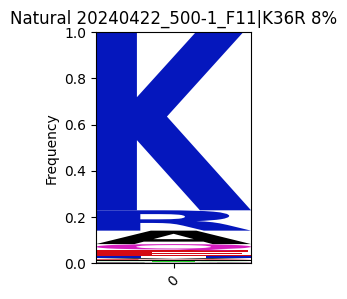

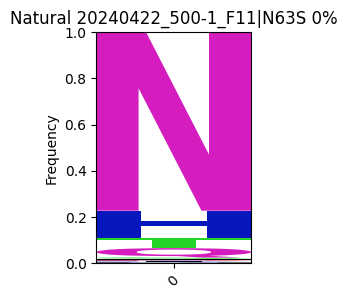

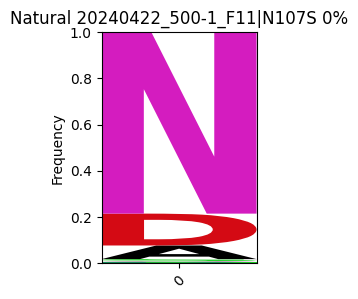

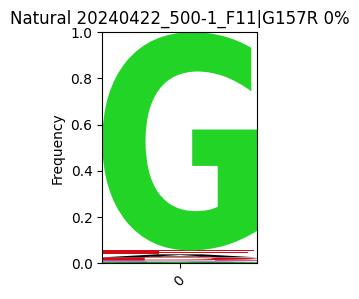

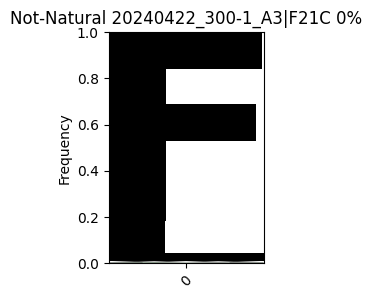

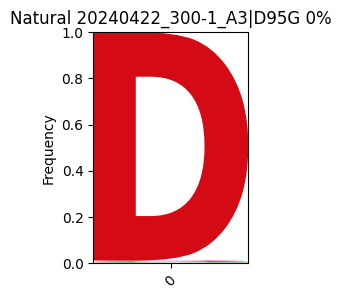

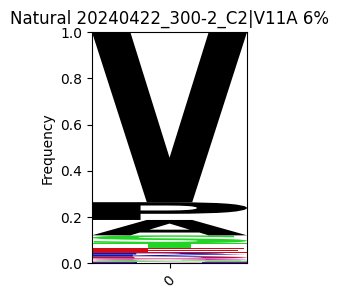

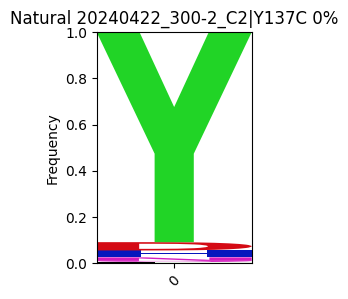

20240422_300-2_A9|W105*


<Figure size 200x300 with 0 Axes>

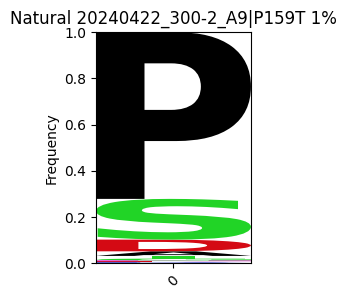

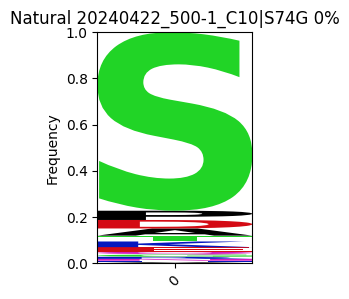

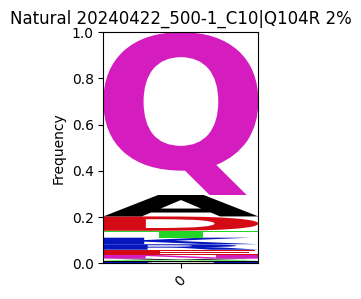

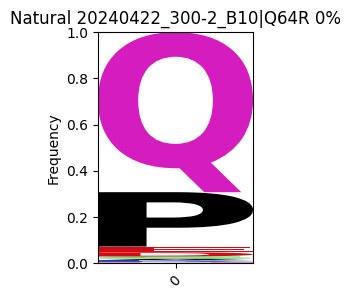

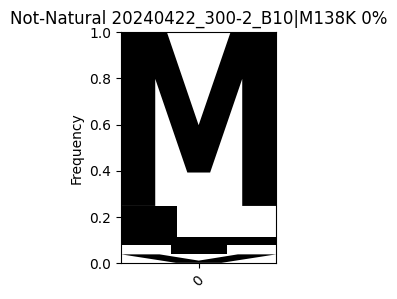

20240422_300-1_H9|L106*


<Figure size 200x300 with 0 Axes>

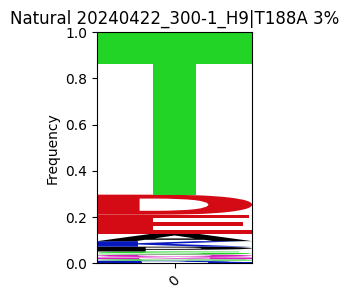

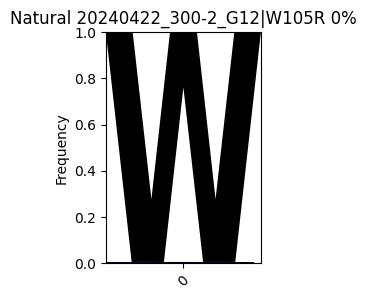

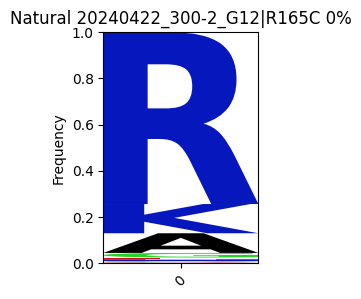

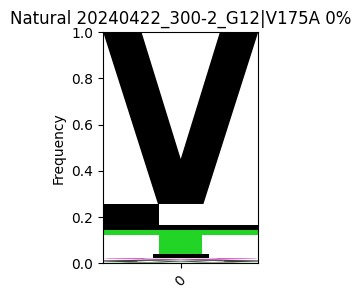

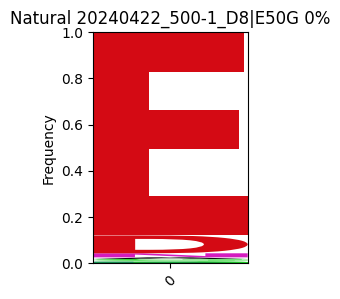

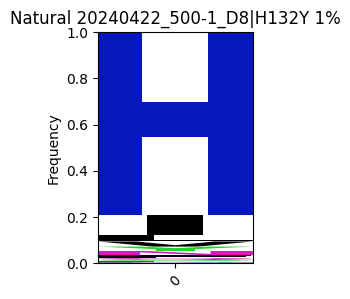

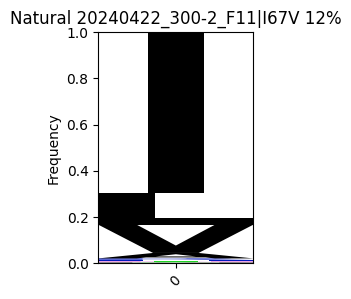

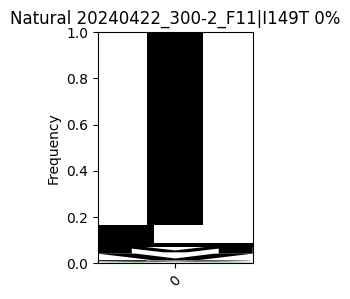

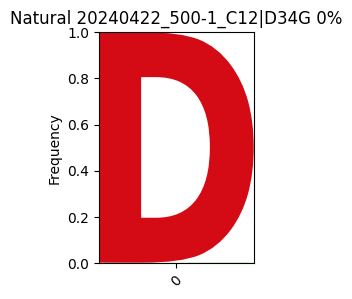

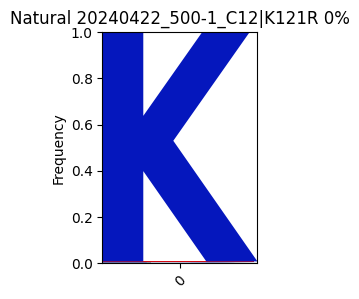

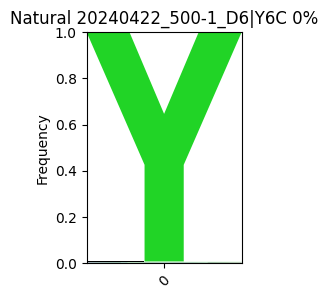

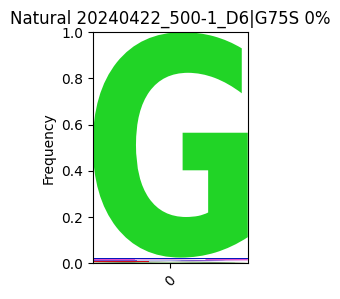

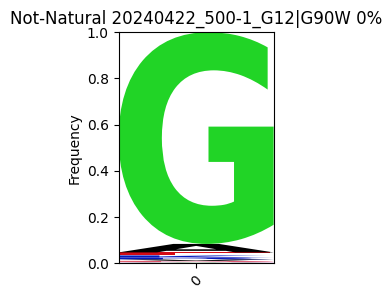

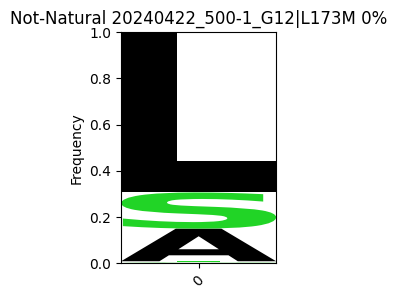

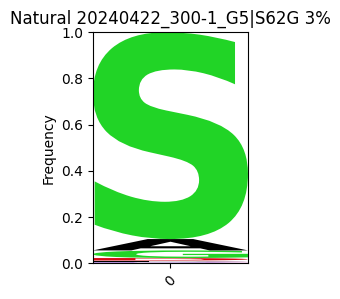

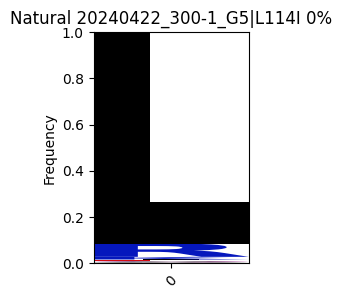

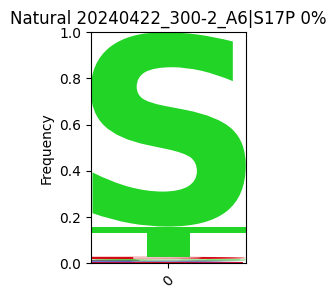

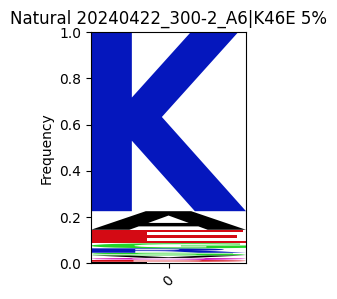

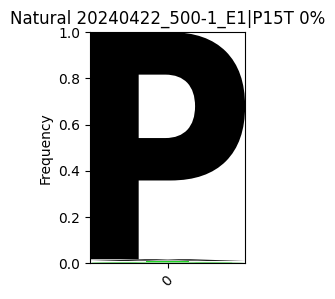

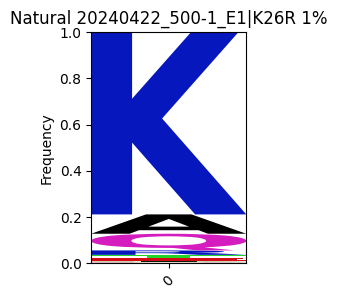

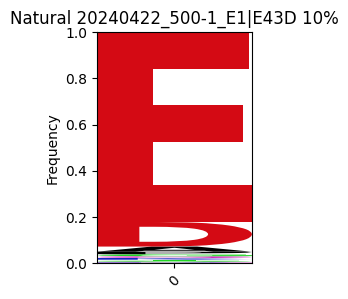

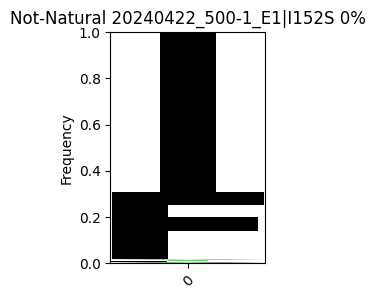

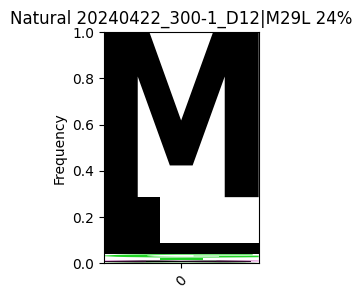

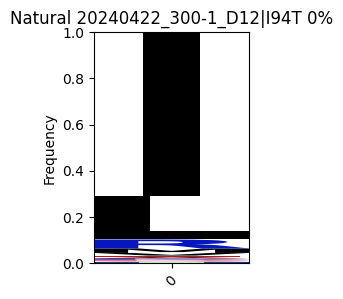

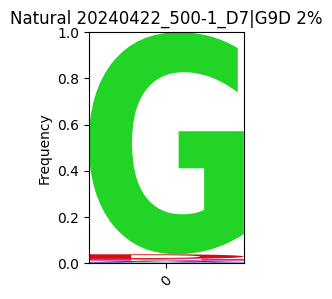

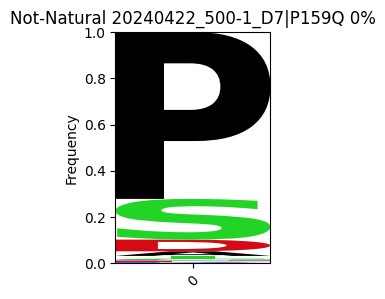

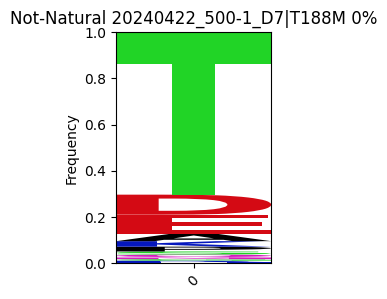

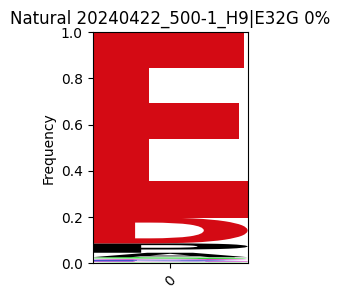

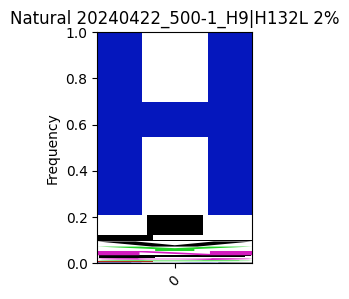

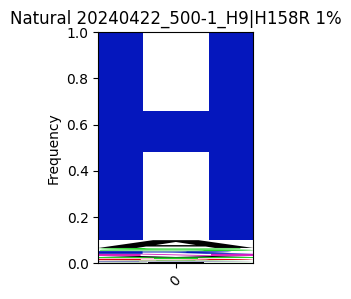

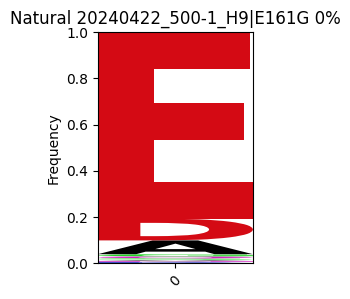

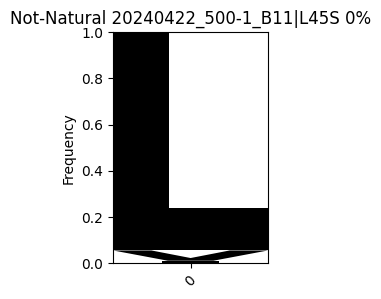

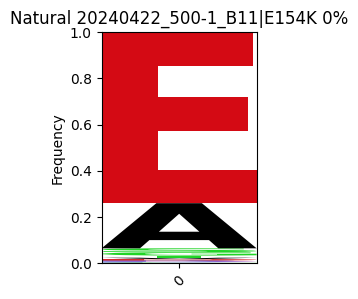

20240422_500-1_B1|E22*


<Figure size 200x300 with 0 Axes>

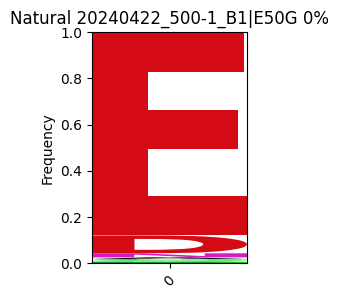

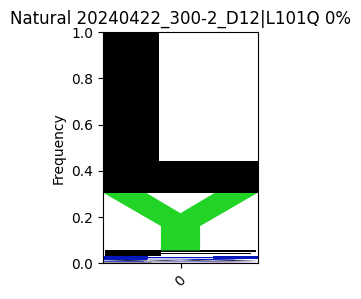

20240422_300-2_D12|W191*


<Figure size 200x300 with 0 Axes>

In [93]:
import numpy as np

for id, position_index in position_map.items():
    try:
        # Now for each one where we have a mutation, let's print the position and a logo plot of that position
        plt.figure(figsize=(2, 3))  # Width, height in inches
        
        amino_acids = [record.seq[position_index] for record in alignment if position_index < len(record.seq)]
        # Do a logo and make the title the ID
        aa_types = 'ACDEFGHIKLMNPQRSTVWY'  # Standard amino acids
    
        counts = {aa: 0 for aa in aa_types}
    
        for aa in amino_acids:
            if aa in counts:
                counts[aa] += 1
        
        # Create a DataFrame for logomaker
        freq_data = pd.DataFrame([counts])
        # Check whether it is natural or not
        position_value = id.split("|")[1]
        new_aa = position_value[-1]
        position_label = ''
        if freq_data[new_aa].values[0] > 1:
            position_label = 'Natural'
        else:
            position_label = 'Not-Natural'
        freq_data = freq_data.divide(np.sum(freq_data.values))
        # Create logo from frequency data
        logo = logomaker.Logo(freq_data, ax=plt.gca())
    
        # Customize and show plot
        logo.style_xticks(anchor=0, spacing=1, rotation=45)
        logo.ax.set_ylabel("Frequency")
        plt.title(f'{position_label} {id} {int(freq_data[new_aa].values[0]*100)}%')
        plt.show()
    except:
        print(id)